## Classifying the Drivers of Recent Venezuelan Migration to Colombia

* Student name: **Serena Quiroga**
* Student pace: **self paced**
* Scheduled project review date/time: **February 28th, 2020**
* Instructor name: **Jeff Herman**
* Blog post URL: https://squiroga8.github.io/a_beginners_guide_to_survey_data_with_python


# **Project Overview**

**Problem Statement:** Can survey data on household demographics, employment, and migration be used to predict the primary reason for recent migration from Venezuela to Colombia?

**Project Background:** For this project, I have sourced household survey data from the National Administrative Department of Statistics of Colombia (DANE) to use in building a classification model for determining the primary motivation for recent migration from Venezuela to Colombia. The target variable is a multi-class variable with 8 categories for different reasons for why the respondent moved from where they resided 12 months ago, such as Employment, Health, Education, threat/risk of physical harm, or accompanying a family member. This variable is asked of respondents who were living somewhere else as of 12 months prior to the survey interview (not at their household location at the time when the survey was conducted). Using the variable that identifies where the respondent was living 12 months ago, I took a subset of the data, narrowing down on respondents who were residing in Venezuela 12 months ago. 

**Project Relevance:** Venezuela has experienced one of the largest outflows of migration in the world, with an estimated 4.6 million Venezuelans having left the country between 2016 and November 2019 (https://www.worldbank.org/en/news/feature/2019/11/26/migracion-venezolana-4500-kilometros-entre-el-abandono-y-la-oportunidad). According to the UNHCR, between 4,000 and 5,000 Venezuelans leave the country every day. As a bordering country, Colombia has been one of the largest recipients of Venezuelan migrants, reaching over 1.6 million Venezuelans in recent years (https://www.msf.org/venezuelans-colombia-unattended-crisis). The Colombian government and international community have been working together to better manage the social and economic challenges of this surge in migration. An important consideration when it comes to humanitarian and development aid, as well as policy support, is to understand the priority needs of migrants and host communities. This can be informed by a detailed understanding of the primary drivers of recent migration. Furthermore, an understanding of any patterns or clustering of migration drivers within Colombia can also provide insights to where more resources are needed.

<img src="Images/VZ_Migration_Colombia_GEIH.png">
(image borrowed from OECD report, https://www.oecd.org/economy/surveys/Colombia-migration-shock-note-english-2019.pdf )

**Project Parameters:** The 2019 GEIH survey is a national survey, and the corresponding survey data is available by the survey module/section, followed by geographic sampling unit (Capital of Municipality/District, Metro Area, and rural/rest), and then by month in 2019. I am beginning with three months worth of data (January-March 2019), focusing on 3 Survey Modules (Migration, General Personal Characteristics, and Employment Efforts) covering the Municipal Capital geographic sampling unit as this provides the most sample and covers the metro area data. That being said, this data is available for each month in 2019, meaning there is potential for application of time series analysis, which is beyond the scope of this current project.

## Project Details:
- **Data Used:** Microdata was downloaded from the sites below and merged into a final dataset used for this project. Individual microdata csv and sav files are available in this repo as well.
    - 2019 GEIH (*Gran Encuesta Integrada de Hogares* = Grand Integrated Household Survey): http://microdatos.dane.gov.co/index.php/catalog/599/study-description
    - 2019 Migration Module of GEIH: http://microdatos.dane.gov.co/index.php/catalog/641/related_materials
    - In this notebook, I used the sav files so that I could access the survey metadata for understanding the variable labels and value labels.
    
- **Packages Used:**
	- pandas
	- numpy
	- missingno
	- pyreadstat
	- matplotlib and seaborn
	- scikit-learn

- **Models Used:**
	- Decision Tree Classifier
	- Support Vector Machine Classifier
	- Random Forest Classifier
	- AdaBoost Classifier

## Project Approach: OSEMiN

For this project, I am using the OSEMiN approach - Obtain Scrub Explore Model iNterpret.
<img src="Images/OSEMiN_approach.png">

**Obtain**: 
- Data was obtained from the Colombian National Department of Statistics, specifically from the 2019 GEIH survey.
- Data was merged into one complete dataset.

**Scrub**: 
- The data was sliced to only include a subset of the total data, specifically focused on respondents that originated from Venezuela as of 12 months prior to the implementation of the survey
- Null values were closely examined and visualized prior to making decisions on whether to keep or remove them.

**Explore**:
- initial exploration was conducted to understand how variables behaved in relation to the target variable
- visualizations of categorical data prior to label encoding using get_dummies

**Model**:
- A baseline classification model was produced
- Hyperparameter tuning with GridSearchCV
- Weighted F1 score was used as the main model performance metric

**Interpret**:
- Summary of findings and model performance
- Suggestions for additional analysis and areas for improvement

## Libraries Used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
plt.style.use('seaborn-notebook')
import seaborn as sns
sns.set_style('whitegrid')
import pyreadstat
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn import svm

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Missingno** Credit: Bilogur, (2018). Missingno: a missing data visualization suite. Journal of Open Source Software, 3(22), 547, https://doi.org/10.21105/joss.00547a


# **Obtain**

The datasets we are obtaining from DANE are broken apart by Module of the survey, per geographic sampling location type, and per month. For the scope of this project, we will use January, February, and March 2019 sav data files, retrieving select survey dataset modules and then merging on the specific respondents of interest for this project - Venezuelan residents as of 12 months ago (12 months prior to the survey). 

Of the survey modules, we will use the Migration Module (MM), the General Characteristics/Demographics Module (CG), and the Employment Effort Module (FT) from one of the three geographic sample designations - administrative head/capital of each municipality. I have decided to not include the the other two geographic sampling unit - Metro Area and Resto - as Cabecera (municipal capital/admin head) provides the most sample and encompasses data from the Metro Area disaggregated datasets. Furthermore, and in consideration of the current migration crisis, I would like to focus on more densely populated areas, which I believe is more suitable for maximizing policy interventions and is more relevant to the current destinations for migrants.

**GEIH 2019**:
**Link to Migration Module (MM) Microdata library:**
http://microdatos.dane.gov.co/index.php/catalog/641/get_microdata
    - Módulo de Migración = Migration Module

**Link to non-MM Modules of the GEIH Survey Microdata libray:** http://microdatos.dane.gov.co/index.php/catalog/599/get_microdata
    - Fuerza de Trabajo = Employment Effort
    - Caracteristicas Generales Personas = General Personal Characteristics

The below are general descriptions of the selected survey modules that we will be using, in addition to the migration module: (http://microdatos.dane.gov.co/index.php/catalog/641/study-description)

• Registration of persons: Identification of the habitual resident.

• General characteristics: Sex, age, kinship, marital status.

• Social security in health: Coverage of the General System of Social Security in Health -SGSSS- by regimes, person who pays membership and coverage.

• Education: literacy, school attendance, maximum educational level reached and last year approved or in progress and degrees or diplomas obtained.

• Workforce: PEA (employed and unemployed)

## Import sav files with metadata using pyreadstat

The individual sav data files can be found in the Data folder of this repo. We will now use `pyreadstat` to read in sav files with their label encodings stored in a meta data container and meta data dictionary. We will import these by month and then survey module (General Personal Characteristics - CG, and Employment Efforts - FT).

In [3]:
# January - General Personal Characteristics (CG) 
jan_cg_df, jan_cg_meta = pyreadstat.read_sav('Data/Jan_Cabecera_Caracteristicas_Generales_Personas.sav', 
                                            apply_value_formats=True)
jan_cg_meta_dict = dict(zip(jan_cg_meta.column_names, jan_cg_meta.column_labels))

In [4]:
# January - Employment Efforts (FT) - Admin Head (Cabecera)
jan_ft_df, jan_ft_meta = pyreadstat.read_sav('Data/Jan_Cabecera_Fuerza_de_Trabajo.sav', 
                                            apply_value_formats=True)
jan_ft_meta_dict = dict(zip(jan_ft_meta.column_names, jan_ft_meta.column_labels))

In [5]:
# February - CG
feb_cg_df, feb_cg_meta = pyreadstat.read_sav('Data/Feb_Cabecera_Caracteristicas_Generales_Personas.sav', 
                                            apply_value_formats=True)
feb_cg_meta_dict = dict(zip(feb_cg_meta.column_names, feb_cg_meta.column_labels))

In [6]:
# February - FT
feb_ft_df, feb_ft_meta = pyreadstat.read_sav('Data/Feb_Cabecera_Fuerza_de_Trabajo.sav', 
                                            apply_value_formats=True)
feb_ft_meta_dict = dict(zip(feb_ft_meta.column_names, feb_ft_meta.column_labels))

In [7]:
# March - CG
mar_cg_df, mar_cg_meta = pyreadstat.read_sav('Data/Mar_Cabecera_Caracteristicas_Generales_Personas.sav', 
                                            apply_value_formats=True)
mar_cg_meta_dict = dict(zip(mar_cg_meta.column_names, mar_cg_meta.column_labels))

In [8]:
# March - FT
mar_ft_df, mar_ft_meta = pyreadstat.read_sav('Data/Mar_Cabecera_Fuerza_de_Trabajo.sav', 
                                            apply_value_formats=True)
mar_ft_meta_dict = dict(zip(mar_ft_meta.column_names, mar_ft_meta.column_labels))

In [9]:
# January - Migration Module
jan_mm_df, jan_mm_meta = pyreadstat.read_sav('Data/Jan_MM.sav', apply_value_formats=True)
jan_mm_meta_dict = dict(zip(jan_mm_meta.column_names, jan_mm_meta.column_labels))

In [10]:
# February - Migration Module
feb_mm_df, feb_mm_meta = pyreadstat.read_sav('Data/Feb_MM.sav', apply_value_formats=True)
feb_mm_meta_dict = dict(zip(feb_mm_meta.column_names, feb_mm_meta.column_labels))

In [11]:
# March - Migration Module
mar_mm_df, mar_mm_meta = pyreadstat.read_sav('Data/Mar_MM.sav', apply_value_formats=True)
mar_mm_meta_dict = dict(zip(mar_mm_meta.column_names, mar_mm_meta.column_labels))

Now let's combine the meta dictionaries into one so that we can get a better understanding of all the variables we have in the MM, CG, and FT modules of the survey.

## Metadata Dictionary - the Variable Questions

In [12]:
# merge the data dictionaries using `.update` method to avoid duplicate keys
full_meta_dict = dict(jan_mm_meta_dict, **jan_cg_meta_dict)
full_meta_dict.update(jan_ft_meta_dict)
full_meta_dict.update(jan_mm_meta_dict)
full_meta_dict.update(feb_cg_meta_dict)
full_meta_dict.update(feb_ft_meta_dict)
full_meta_dict.update(feb_mm_meta_dict)
full_meta_dict.update(mar_cg_meta_dict)
full_meta_dict.update(mar_ft_meta_dict)
full_meta_dict.update(mar_mm_meta_dict)
full_meta_dict

{'Directorio': 'DIRECTORIO',
 'Secuencia_p': 'SECUENCIA_P',
 'Orden': 'ORDEN',
 'P6074': '¿…….. siempre ha vivido en este  municipio?',
 'P756': 'Dónde nació…..:',
 'P756S1': 'En otro Municipio: Departamento:____________________',
 'P756S3': 'En otro país:',
 'P755': '¿Dónde vivía …. , hace cinco años?',
 'P755S1': '¿Dónde vivía …. , hace cinco años? Departamento:',
 'P755S3': '¿Dónde vivía …. , hace cinco años?  En otro pais',
 'P754': 'El lugar donde vivía ……. hace cinco años era:',
 'P753': '¿Dónde vivía …. , hace 12 meses?',
 'P753S1': '¿Dónde vivía …. , hace 12 meses? Departamento:',
 'P753S3': '¿Dónde vivía …. , hace 12 meses? En otro pais',
 'P752': 'El lugar donde vivía ……. hace 12 meses era:',
 'P1662': '¿Cuál fue el principal motivo por el que …. Cambió el lugar donde residia hace 12 meses?',
 'Mes': 'Mes',
 'Fex_c_2011': 'Factor de expansión',
 'DIRECTORIO': 'Directorio',
 'SECUENCIA_P': 'Secuencia_p',
 'ORDEN': 'Orden',
 'HOGAR': 'Hogar',
 'REGIS': 'Registro de la encuesta'

# **Scrub**

Now that we have obtained the data that we will use for this project, it's time to Scrub the data by removing unnecessary columns, concatenating and merging the various dataframes, and dealing with null values. Let's first start by taking a quick look at our individual dataframes.

In [13]:
# Make a list of our dataframes so that we can quickly display their shapes and previews of the data
# Start with the CG dataframes across the three months
cgdf_list = [jan_cg_df, feb_cg_df, mar_cg_df]
for df in cgdf_list:
    df.shape
    df.head()

(56644, 38)

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,REGIS,P6016,P6020,P6030S1,P6030S3,P6040,...,P6210,P6210S1,P6220,P6269,CLASE,ESC,MES,DPTO,fex_c_2011,AREA
0,4804535.0,1.0,1.0,1.0,10,1.0,Mujer,5.0,1948.0,70.0,...,Básica primaria (1o - 5o),1.0,NaN,NaN,Urbano,1.0,01,Antioquia,930.626305,Medellín AM
1,4804535.0,1.0,2.0,1.0,10,2.0,Hombre,9.0,1980.0,38.0,...,Básica primaria (1o - 5o),3.0,NaN,NaN,Urbano,3.0,01,Antioquia,930.626305,Medellín AM
2,4804535.0,1.0,3.0,1.0,10,3.0,Mujer,8.0,1995.0,23.0,...,Media (10o - 13o),11.0,Bachiller,NaN,Urbano,11.0,01,Antioquia,930.626305,Medellín AM
3,4804536.0,1.0,1.0,1.0,10,1.0,Mujer,8.0,1997.0,21.0,...,Media (10o - 13o),11.0,Bachiller,NaN,Urbano,11.0,01,Antioquia,1097.211116,Medellín AM
4,4804536.0,1.0,2.0,1.0,10,1.0,Mujer,10.0,2014.0,4.0,...,Preescolar,0.0,NaN,NaN,Urbano,0.0,01,Antioquia,1097.211116,Medellín AM


(58182, 38)

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,REGIS,P6016,P6020,P6030S1,P6030S3,P6040,...,P6210,P6210S1,P6220,P6269,CLASE,ESC,MES,DPTO,fex_c_2011,AREA
0,4829993.0,1.0,1.0,1.0,10,1.0,Hombre,4.0,1969.0,49.0,...,Superior o universitaria,6.0,Postgrado,NaN,Urbano,17.0,02,Santander,3418.255616,
1,4829993.0,1.0,2.0,1.0,10,2.0,Mujer,11.0,1981.0,37.0,...,Superior o universitaria,11.0,Postgrado,NaN,Urbano,22.0,02,Santander,3418.255616,
2,4829993.0,1.0,3.0,1.0,10,1.0,Hombre,3.0,2015.0,3.0,...,Preescolar,0.0,NaN,NaN,Urbano,0.0,02,Santander,3418.255616,
3,4829994.0,1.0,1.0,1.0,10,1.0,Hombre,8.0,1962.0,56.0,...,Superior o universitaria,6.0,Postgrado,NaN,Urbano,17.0,02,Santander,3506.587672,
4,4829994.0,1.0,2.0,1.0,10,2.0,Mujer,5.0,1968.0,50.0,...,Superior o universitaria,3.0,Técnico o tecnológico,NaN,Urbano,14.0,02,Santander,3506.587672,


(57182, 38)

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,REGIS,P6016,P6020,P6030S1,P6030S3,P6040,...,P6210,P6210S1,P6220,P6269,CLASE,ESC,MES,DPTO,fex_c_2011,AREA
0,4854431.0,1.0,1.0,1.0,10,1.0,Hombre,4.0,1964.0,54.0,...,Media (10o - 13o),11.0,Bachiller,NaN,Urbano,11.0,03,Valle del cauca,2042.852685,
1,4854431.0,1.0,2.0,1.0,10,2.0,Mujer,7.0,1970.0,48.0,...,Superior o universitaria,2.0,Técnico o tecnológico,NaN,Urbano,13.0,03,Valle del cauca,2042.852685,
2,4854431.0,1.0,3.0,1.0,10,1.0,Mujer,12.0,2009.0,9.0,...,Básica primaria (1o - 5o),3.0,NaN,NaN,Urbano,3.0,03,Valle del cauca,2042.852685,
3,4854432.0,1.0,1.0,1.0,10,1.0,Hombre,5.0,1960.0,58.0,...,Superior o universitaria,7.0,Postgrado,NaN,Urbano,18.0,03,Valle del cauca,1817.617866,
4,4854432.0,1.0,2.0,1.0,10,2.0,Mujer,10.0,1963.0,55.0,...,Superior o universitaria,7.0,Postgrado,NaN,Urbano,18.0,03,Valle del cauca,1817.617866,


In [14]:
# FT dataframes across the three months
ftdf_list = [jan_ft_df, feb_ft_df, mar_ft_df]
for df in ftdf_list:
    df.shape
    df.head()

(46815, 28)

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,REGIS,AREA,CLASE,P6290,P6290S1,P6230,...,P6310S1,P6320,P6330,P6340,P6350,P6351,MES,FT,DPTO,fex_c_2011
0,4804535.0,1.0,1.0,1.0,50,Medellín AM,Urbano,NaN,,1.0,...,,NaN,NaN,NaN,NaN,NaN,01,Fuerza de trabajo,Antioquia,930.626305
1,4804535.0,1.0,2.0,1.0,50,Medellín AM,Urbano,NaN,,2.0,...,,NaN,NaN,NaN,NaN,NaN,01,Fuerza de trabajo,Antioquia,930.626305
2,4804535.0,1.0,3.0,1.0,50,Medellín AM,Urbano,NaN,,3.0,...,,NaN,NaN,NaN,NaN,NaN,01,Fuerza de trabajo,Antioquia,930.626305
3,4804536.0,1.0,1.0,1.0,50,Medellín AM,Urbano,NaN,,1.0,...,,NaN,NaN,NaN,NaN,NaN,01,Fuerza de trabajo,Antioquia,1097.211116
4,4804537.0,1.0,1.0,1.0,50,Medellín AM,Urbano,NaN,,1.0,...,,NaN,NaN,NaN,NaN,NaN,01,Fuerza de trabajo,Antioquia,827.297496


(48011, 28)

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,REGIS,AREA,CLASE,P6290,P6290S1,P6230,...,P6310S1,P6320,P6330,P6340,P6350,P6351,MES,FT,DPTO,fex_c_2011
0,4829993.0,1.0,1.0,1.0,50,,Urbano,NaN,,1.0,...,,NaN,NaN,NaN,NaN,NaN,02,Fuerza de trabajo,Santander,3418.255616
1,4829993.0,1.0,2.0,1.0,50,,Urbano,NaN,,2.0,...,,NaN,NaN,NaN,NaN,NaN,02,Fuerza de trabajo,Santander,3418.255616
2,4829994.0,1.0,1.0,1.0,50,,Urbano,NaN,,1.0,...,,NaN,NaN,NaN,NaN,NaN,02,Fuerza de trabajo,Santander,3506.587672
3,4829994.0,1.0,2.0,1.0,50,,Urbano,NaN,,2.0,...,,NaN,NaN,NaN,NaN,NaN,02,Fuerza de trabajo,Santander,3506.587672
4,4829994.0,1.0,3.0,1.0,50,,Urbano,"Visitó, llevó o envió hojas de vida a empresas...",,3.0,...,,NaN,NaN,NaN,NaN,Sí,02,Fuerza de trabajo,Santander,3506.587672


(47266, 28)

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,REGIS,AREA,CLASE,P6290,P6290S1,P6230,...,P6310S1,P6320,P6330,P6340,P6350,P6351,MES,FT,DPTO,fex_c_2011
0,4854431.0,1.0,1.0,1.0,50,,Urbano,NaN,,1.0,...,,NaN,NaN,NaN,NaN,NaN,03,Fuerza de trabajo,Valle del cauca,2042.852685
1,4854431.0,1.0,2.0,1.0,50,,Urbano,NaN,,2.0,...,,NaN,NaN,NaN,NaN,NaN,03,Fuerza de trabajo,Valle del cauca,2042.852685
2,4854432.0,1.0,1.0,1.0,50,,Urbano,NaN,,1.0,...,,NaN,NaN,NaN,NaN,NaN,03,Fuerza de trabajo,Valle del cauca,1817.617866
3,4854432.0,1.0,2.0,1.0,50,,Urbano,NaN,,2.0,...,,NaN,NaN,NaN,NaN,NaN,03,Fuerza de trabajo,Valle del cauca,1817.617866
4,4854433.0,1.0,1.0,1.0,50,,Urbano,NaN,,1.0,...,,NaN,NaN,NaN,NaN,NaN,03,Fuerza de trabajo,Valle del cauca,2431.934641


In [15]:
# MM dataframes across the three months
mmdf_list = [jan_mm_df, feb_mm_df, mar_mm_df]
for df in mmdf_list:
    df.shape
    df.head()

(62538, 18)

,Directorio,Secuencia_p,Orden,P6074,P756,P756S1,P756S3,P755,P755S1,P755S3,P754,P753,P753S1,P753S3,P752,P1662,Mes,Fex_c_2011
0,4804535.0,1.0,1.0,1.0,2.0,5,NaN,En este municipio,,NaN,¿La cabecera municipal (donde está la alcaldía)?,En este municipio,,NaN,1.0,NaN,01,930.626305
1,4804535.0,1.0,2.0,1.0,1.0,,NaN,En este municipio,,NaN,¿La cabecera municipal (donde está la alcaldía)?,En este municipio,,NaN,1.0,NaN,01,930.626305
2,4804535.0,1.0,3.0,1.0,1.0,,NaN,En este municipio,,NaN,¿La cabecera municipal (donde está la alcaldía)?,En este municipio,,NaN,1.0,NaN,01,930.626305
3,4804536.0,1.0,1.0,2.0,2.0,23,NaN,En este municipio,,NaN,¿La cabecera municipal (donde está la alcaldía)?,En este municipio,,NaN,1.0,NaN,01,1097.211116
4,4804536.0,1.0,2.0,1.0,1.0,,NaN,No había nacido,,NaN,NaN,En este municipio,,NaN,1.0,NaN,01,1097.211116


(64038, 18)

,Directorio,Secuencia_p,Orden,P6074,P756,P756S1,P756S3,P755,P755S1,P755S3,P754,P753,P753S1,P753S3,P752,P1662,Mes,Fex_c_2011
0,4829993.0,1.0,1.0,No,1.0,,NaN,En este municipio,,NaN,¿La cabecera municipal (donde está la alcaldía)?,En este municipio,,NaN,1.0,NaN,02,3418.255616
1,4829993.0,1.0,2.0,No,1.0,,NaN,En este municipio,,NaN,¿La cabecera municipal (donde está la alcaldía)?,En este municipio,,NaN,1.0,NaN,02,3418.255616
2,4829993.0,1.0,3.0,Si,1.0,,NaN,No había nacido,,NaN,NaN,En este municipio,,NaN,1.0,NaN,02,3418.255616
3,4829994.0,1.0,1.0,No,1.0,,NaN,En este municipio,,NaN,¿La cabecera municipal (donde está la alcaldía)?,En este municipio,,NaN,1.0,NaN,02,3506.587672
4,4829994.0,1.0,2.0,No,2.0,68,NaN,En este municipio,,NaN,¿La cabecera municipal (donde está la alcaldía)?,En este municipio,,NaN,1.0,NaN,02,3506.587672


(63068, 18)

,Directorio,Secuencia_p,Orden,P6074,P756,P756S1,P756S3,P755,P755S1,P755S3,P754,P753,P753S1,P753S3,P752,P1662,Mes,Fex_c_2011
0,4854431.0,1.0,1.0,Si,1.0,,NaN,En este municipio,,NaN,¿La cabecera municipal (donde está la alcaldía)?,En este municipio,,NaN,1.0,NaN,03,2042.852685
1,4854431.0,1.0,2.0,Si,1.0,,NaN,En este municipio,,NaN,¿La cabecera municipal (donde está la alcaldía)?,En este municipio,,NaN,1.0,NaN,03,2042.852685
2,4854431.0,1.0,3.0,Si,1.0,,NaN,En este municipio,,NaN,¿La cabecera municipal (donde está la alcaldía)?,En este municipio,,NaN,1.0,NaN,03,2042.852685
3,4854432.0,1.0,1.0,Si,1.0,,NaN,En este municipio,,NaN,¿La cabecera municipal (donde está la alcaldía)?,En este municipio,,NaN,1.0,NaN,03,1817.617866
4,4854432.0,1.0,2.0,Si,1.0,,NaN,En este municipio,,NaN,¿La cabecera municipal (donde está la alcaldía)?,En este municipio,,NaN,1.0,NaN,03,1817.617866


The variables align across the three months for each of the survey modules - CG, FT, and MM. Let's move onto Concatenating and then Merging them into one dataframe.

## Concatenating and Merging our Data

We will first start by concatenating the two survey modules (CG and FT) across the three months, then merge those two dataframes/survey modules, followed by a left merge with our migration module on the specific subset of respondents we're interested in for this project. We'll start with each survey module and concatenate the three months.

### Concatenate across the 3 months by Survey Module

In [16]:
print("Jan CG columns {}".format(len(jan_cg_df.columns)))
jan_cg_df.columns
jan_cg_df.shape
print("Feb CG columns {}".format(len(feb_cg_df.columns)))
feb_cg_df.columns
feb_cg_df.shape
print("Mar CG Columns {}".format(len(mar_cg_df.columns)))
mar_cg_df.columns
mar_cg_df.shape

Jan CG columns 38


Index(['DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'HOGAR', 'REGIS', 'P6016',
       'P6020', 'P6030S1', 'P6030S3', 'P6040', 'P6050', 'P6070', 'P6081',
       'P6081S1', 'P6083', 'P6083S1', 'P6071', 'P6071S1', 'P6090', 'P6140',
       'P6150', 'P6100', 'P6110', 'P6120', 'P6125', 'P6160', 'P6170', 'P6175',
       'P6210', 'P6210S1', 'P6220', 'P6269', 'CLASE', 'ESC', 'MES', 'DPTO',
       'fex_c_2011', 'AREA'],
      dtype='object')

(56644, 38)

Feb CG columns 38


Index(['DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'HOGAR', 'REGIS', 'P6016',
       'P6020', 'P6030S1', 'P6030S3', 'P6040', 'P6050', 'P6070', 'P6081',
       'P6081S1', 'P6083', 'P6083S1', 'P6071', 'P6071S1', 'P6090', 'P6140',
       'P6150', 'P6100', 'P6110', 'P6120', 'P6125', 'P6160', 'P6170', 'P6175',
       'P6210', 'P6210S1', 'P6220', 'P6269', 'CLASE', 'ESC', 'MES', 'DPTO',
       'fex_c_2011', 'AREA'],
      dtype='object')

(58182, 38)

Mar CG Columns 38


Index(['DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'HOGAR', 'REGIS', 'P6016',
       'P6020', 'P6030S1', 'P6030S3', 'P6040', 'P6050', 'P6070', 'P6081',
       'P6081S1', 'P6083', 'P6083S1', 'P6071', 'P6071S1', 'P6090', 'P6140',
       'P6150', 'P6100', 'P6110', 'P6120', 'P6125', 'P6160', 'P6170', 'P6175',
       'P6210', 'P6210S1', 'P6220', 'P6269', 'CLASE', 'ESC', 'MES', 'DPTO',
       'fex_c_2011', 'AREA'],
      dtype='object')

(57182, 38)

In [17]:
# Concatenate the CG (General Personal Characteristics) dataframes across the 3 months
cg_df = pd.concat(cgdf_list, sort=True)
cg_df.shape
cg_df.head()

(172008, 38)

,AREA,CLASE,DIRECTORIO,DPTO,ESC,HOGAR,MES,ORDEN,P6016,P6020,...,P6160,P6170,P6175,P6210,P6210S1,P6220,P6269,REGIS,SECUENCIA_P,fex_c_2011
0,Medellín AM,Urbano,4804535.0,Antioquia,1.0,1.0,01,1.0,1.0,Mujer,...,No,No,NaN,Básica primaria (1o - 5o),1.0,NaN,NaN,10,1.0,930.626305
1,Medellín AM,Urbano,4804535.0,Antioquia,3.0,1.0,01,2.0,2.0,Hombre,...,Sí,No,NaN,Básica primaria (1o - 5o),3.0,NaN,NaN,10,1.0,930.626305
2,Medellín AM,Urbano,4804535.0,Antioquia,11.0,1.0,01,3.0,3.0,Mujer,...,Sí,No,NaN,Media (10o - 13o),11.0,Bachiller,NaN,10,1.0,930.626305
3,Medellín AM,Urbano,4804536.0,Antioquia,11.0,1.0,01,1.0,1.0,Mujer,...,Sí,No,NaN,Media (10o - 13o),11.0,Bachiller,NaN,10,1.0,1097.211116
4,Medellín AM,Urbano,4804536.0,Antioquia,0.0,1.0,01,2.0,1.0,Mujer,...,No,Sí,Sí,Preescolar,0.0,NaN,NaN,10,1.0,1097.211116


In [18]:
# Concatenate the Employment Efforts dataframes across the 3 months
ft_df = pd.concat(ftdf_list, sort=True)
ft_df.shape
ft_df.head()

(142092, 28)

,AREA,CLASE,DIRECTORIO,DPTO,FT,HOGAR,MES,ORDEN,P6230,P6240,...,P6310,P6310S1,P6320,P6330,P6340,P6350,P6351,REGIS,SECUENCIA_P,fex_c_2011
0,Medellín AM,Urbano,4804535.0,Antioquia,Fuerza de trabajo,1.0,01,1.0,1.0,Oficios del hogar,...,NaN,,NaN,NaN,NaN,NaN,NaN,50,1.0,930.626305
1,Medellín AM,Urbano,4804535.0,Antioquia,Fuerza de trabajo,1.0,01,2.0,2.0,Trabajando,...,NaN,,NaN,NaN,NaN,NaN,NaN,50,1.0,930.626305
2,Medellín AM,Urbano,4804535.0,Antioquia,Fuerza de trabajo,1.0,01,3.0,3.0,Trabajando,...,NaN,,NaN,NaN,NaN,NaN,NaN,50,1.0,930.626305
3,Medellín AM,Urbano,4804536.0,Antioquia,Fuerza de trabajo,1.0,01,1.0,1.0,Trabajando,...,NaN,,NaN,NaN,NaN,NaN,NaN,50,1.0,1097.211116
4,Medellín AM,Urbano,4804537.0,Antioquia,Fuerza de trabajo,1.0,01,1.0,1.0,Trabajando,...,NaN,,NaN,NaN,NaN,NaN,NaN,50,1.0,827.297496


In [19]:
# Concatenate the Migration Module dataframes across the 3 months
mm_df = pd.concat(mmdf_list, sort=True)
mm_df.shape
mm_df.head()

(189644, 18)

,Directorio,Fex_c_2011,Mes,Orden,P1662,P6074,P752,P753,P753S1,P753S3,P754,P755,P755S1,P755S3,P756,P756S1,P756S3,Secuencia_p
0,4804535.0,930.626305,01,1.0,NaN,1,1.0,En este municipio,,NaN,¿La cabecera municipal (donde está la alcaldía)?,En este municipio,,NaN,2.0,5,NaN,1.0
1,4804535.0,930.626305,01,2.0,NaN,1,1.0,En este municipio,,NaN,¿La cabecera municipal (donde está la alcaldía)?,En este municipio,,NaN,1.0,,NaN,1.0
2,4804535.0,930.626305,01,3.0,NaN,1,1.0,En este municipio,,NaN,¿La cabecera municipal (donde está la alcaldía)?,En este municipio,,NaN,1.0,,NaN,1.0
3,4804536.0,1097.211116,01,1.0,NaN,2,1.0,En este municipio,,NaN,¿La cabecera municipal (donde está la alcaldía)?,En este municipio,,NaN,2.0,23,NaN,1.0
4,4804536.0,1097.211116,01,2.0,NaN,1,1.0,En este municipio,,NaN,NaN,No había nacido,,NaN,1.0,,NaN,1.0


### Removing non-essential FT columns

Before we proceed with merging our data across the different survey modules, we will remove most of the FT columns except the select few that are of interest to us - namely the employment status of respondents. Specifically, from the FT module, we are interested in keeping `P6240` and `P6250` within our data. 

In [20]:
ft_df.columns

Index(['AREA', 'CLASE', 'DIRECTORIO', 'DPTO', 'FT', 'HOGAR', 'MES', 'ORDEN',
       'P6230', 'P6240', 'P6240S1', 'P6250', 'P6260', 'P6270', 'P6280',
       'P6290', 'P6290S1', 'P6300', 'P6310', 'P6310S1', 'P6320', 'P6330',
       'P6340', 'P6350', 'P6351', 'REGIS', 'SECUENCIA_P', 'fex_c_2011'],
      dtype='object')

In [21]:
# Drop all columns except columns of interest and columns for merging
ft_df.drop(['P6230', 'P6240S1', 'P6260', 'P6270', 'P6280',
       'P6290', 'P6290S1', 'P6300', 'P6310', 'P6310S1', 'P6320', 'P6330',
       'P6340', 'P6350', 'P6351', ], inplace=True, axis=1)
ft_df.head()

,AREA,CLASE,DIRECTORIO,DPTO,FT,HOGAR,MES,ORDEN,P6240,P6250,REGIS,SECUENCIA_P,fex_c_2011
0,Medellín AM,Urbano,4804535.0,Antioquia,Fuerza de trabajo,1.0,01,1.0,Oficios del hogar,No,50,1.0,930.626305
1,Medellín AM,Urbano,4804535.0,Antioquia,Fuerza de trabajo,1.0,01,2.0,Trabajando,NaN,50,1.0,930.626305
2,Medellín AM,Urbano,4804535.0,Antioquia,Fuerza de trabajo,1.0,01,3.0,Trabajando,NaN,50,1.0,930.626305
3,Medellín AM,Urbano,4804536.0,Antioquia,Fuerza de trabajo,1.0,01,1.0,Trabajando,NaN,50,1.0,1097.211116
4,Medellín AM,Urbano,4804537.0,Antioquia,Fuerza de trabajo,1.0,01,1.0,Trabajando,NaN,50,1.0,827.297496


### Merging Data

Now let's merge the CG and FT dataframes before merging with the Migration Module. Between these two dataframes, we have 10 variables with the same column names. Let's determine the best way to merge these two modules.

#### Merge CG and FT

In [22]:
cg_df.columns

Index(['AREA', 'CLASE', 'DIRECTORIO', 'DPTO', 'ESC', 'HOGAR', 'MES', 'ORDEN',
       'P6016', 'P6020', 'P6030S1', 'P6030S3', 'P6040', 'P6050', 'P6070',
       'P6071', 'P6071S1', 'P6081', 'P6081S1', 'P6083', 'P6083S1', 'P6090',
       'P6100', 'P6110', 'P6120', 'P6125', 'P6140', 'P6150', 'P6160', 'P6170',
       'P6175', 'P6210', 'P6210S1', 'P6220', 'P6269', 'REGIS', 'SECUENCIA_P',
       'fex_c_2011'],
      dtype='object')

In [23]:
ft_df.columns

Index(['AREA', 'CLASE', 'DIRECTORIO', 'DPTO', 'FT', 'HOGAR', 'MES', 'ORDEN',
       'P6240', 'P6250', 'REGIS', 'SECUENCIA_P', 'fex_c_2011'],
      dtype='object')

In [24]:
# Confirm that there are no null values in these potential matching variables
print("FT and CG Matching Variables: Null Values Check")
ft_df[['AREA', 'CLASE', 'DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 
       'HOGAR', 'REGIS', 'DPTO', 'MES', 'fex_c_2011']].isnull().sum()
cg_df[['AREA', 'CLASE', 'DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 
       'HOGAR', 'REGIS', 'DPTO', 'MES', 'fex_c_2011']].isnull().sum()

FT and CG Matching Variables: Null Values Check


AREA           0
CLASE          0
DIRECTORIO     0
SECUENCIA_P    0
ORDEN          0
HOGAR          0
REGIS          0
DPTO           0
MES            0
fex_c_2011     0
dtype: int64

AREA           0
CLASE          0
DIRECTORIO     0
SECUENCIA_P    0
ORDEN          0
HOGAR          0
REGIS          0
DPTO           0
MES            0
fex_c_2011     0
dtype: int64

In [25]:
# look at value_counts for these potential matching variables
print("FT and CG Matching Variables: Value Count Check")
ft_df[['AREA', 'CLASE', 'DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 
       'HOGAR', 'REGIS', 'DPTO', 'MES', 'fex_c_2011']].nunique()
cg_df[['AREA', 'CLASE', 'DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 
       'HOGAR', 'REGIS', 'DPTO', 'MES', 'fex_c_2011']].nunique()

FT and CG Matching Variables: Value Count Check


AREA              24
CLASE              1
DIRECTORIO     51642
SECUENCIA_P        7
ORDEN             23
HOGAR              7
REGIS              1
DPTO              24
MES                3
fex_c_2011     21650
dtype: int64

AREA              24
CLASE              1
DIRECTORIO     51642
SECUENCIA_P        7
ORDEN             24
HOGAR              7
REGIS              1
DPTO              24
MES                3
fex_c_2011     21650
dtype: int64

`REGIS` is the survey identifier, but since we are just using one survey, this column doesn't add any information so we will remove. `FT` is a survey module identifier for the FT module, so we will go ahead and remove this column because it doesn't add any information to our model.

In [26]:
# Drop REGIS and FT as these are more for identification of the survey and do not provide helpful info
cg_df.drop('REGIS', inplace=True, axis=1)
ft_df.drop('REGIS', inplace=True, axis=1)
ft_df.drop('FT', inplace=True, axis=1)

In [27]:
ft_df.shape
cg_df.shape

(142092, 11)

(172008, 37)

In [28]:
# Right merge on FT because we only want to keep the subset with employment activity data
cgft = pd.merge(cg_df, ft_df, how="right", on=['AREA', 'CLASE', 'DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 
                                               'HOGAR', 'DPTO', 'MES', 'fex_c_2011'])
cgft.shape
cgft.head()

(142092, 39)

,AREA,CLASE,DIRECTORIO,DPTO,ESC,HOGAR,MES,ORDEN,P6016,P6020,...,P6170,P6175,P6210,P6210S1,P6220,P6269,SECUENCIA_P,fex_c_2011,P6240,P6250
0,Medellín AM,Urbano,4804535.0,Antioquia,1.0,1.0,01,1.0,1.0,Mujer,...,No,NaN,Básica primaria (1o - 5o),1.0,NaN,NaN,1.0,930.626305,Oficios del hogar,No
1,Medellín AM,Urbano,4804535.0,Antioquia,3.0,1.0,01,2.0,2.0,Hombre,...,No,NaN,Básica primaria (1o - 5o),3.0,NaN,NaN,1.0,930.626305,Trabajando,NaN
2,Medellín AM,Urbano,4804535.0,Antioquia,11.0,1.0,01,3.0,3.0,Mujer,...,No,NaN,Media (10o - 13o),11.0,Bachiller,NaN,1.0,930.626305,Trabajando,NaN
3,Medellín AM,Urbano,4804536.0,Antioquia,11.0,1.0,01,1.0,1.0,Mujer,...,No,NaN,Media (10o - 13o),11.0,Bachiller,NaN,1.0,1097.211116,Trabajando,NaN
4,Medellín AM,Urbano,4804537.0,Antioquia,2.0,1.0,01,1.0,1.0,Hombre,...,No,NaN,Básica primaria (1o - 5o),2.0,NaN,NaN,1.0,827.297496,Trabajando,NaN


#### Merge on Migration - Selecting Recent Venezuelan Residents

Before we can make the final dataframe containing our various survey modules, we will first narrow down the Migration Module.  The variable of interest for us will be `P753S3` because this provides us with where (which country) the respondent was residing 12 months ago.  This corresponds to our target variable `P1662` which asks what was the principal reason the respondent left where they were living 12 months ago. 

In order to merge the dataframes, we will need to get a better understanding of this column and its variable value labels so that we can make sure to subset for respondents who were living in Venezuela 12 months ago.

In [29]:
jan_mm_df.P753S3.value_counts()

Venezuela         930
Otro pais          31
Estados Unidos     13
Ecuador            11
Panamá             10
España              9
Argentina           6
Perú                3
Italia              1
Name: P753S3, dtype: int64

In [30]:
# examine value labels using the pyreadstat meta data container
jan_mm_meta.variable_value_labels['P753S3']

{1.0: 'Estados Unidos',
 2.0: 'España',
 3.0: 'Venezuela',
 4.0: 'Ecuador',
 5.0: 'Panamá',
 6.0: 'Perú',
 7.0: 'Costa Rica',
 8.0: 'Argentina',
 9.0: 'Francia',
 10.0: 'Italia',
 11.0: 'Otro pais'}

Since we are only interested in respondents who were living in Venezuela 12 months before this survey, we will slice the `mm_df` to select these respondents. We will then perform a left merge on this dataframe with the other dataset.

In [31]:
# Make a dataframe containing respondents who were living in Venezuela 12 months ago
ven_mm = mm_df.loc[mm_df['P753S3'] == 'Venezuela']
ven_mm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2768 entries, 485 to 62923
Data columns (total 18 columns):
Directorio     2768 non-null float64
Fex_c_2011     2768 non-null float64
Mes            2768 non-null object
Orden          2768 non-null float64
P1662          2768 non-null object
P6074          2768 non-null object
P752           0 non-null float64
P753           2768 non-null category
P753S1         2768 non-null object
P753S3         2768 non-null object
P754           7 non-null category
P755           2768 non-null category
P755S1         2768 non-null object
P755S3         2465 non-null category
P756           2768 non-null float64
P756S1         2768 non-null object
P756S3         2521 non-null object
Secuencia_p    2768 non-null float64
dtypes: category(4), float64(6), object(8)
memory usage: 336.1+ KB


In [32]:
# Merge our Venezuelan born respondents Migration module dataframe with the other merged dataframe
ven_df = pd.merge(ven_mm, cgft, how='inner', 
                 left_on=['Directorio', 'Secuencia_p', 'Orden', 'Fex_c_2011', 'Mes'], 
                 right_on=['DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'fex_c_2011', 'MES'])
ven_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1979
Data columns (total 57 columns):
Directorio     1980 non-null float64
Fex_c_2011     1980 non-null float64
Mes            1980 non-null object
Orden          1980 non-null float64
P1662          1980 non-null object
P6074          1980 non-null object
P752           0 non-null float64
P753           1980 non-null category
P753S1         1980 non-null object
P753S3         1980 non-null object
P754           6 non-null category
P755           1980 non-null category
P755S1         1980 non-null object
P755S3         1970 non-null category
P756           1980 non-null float64
P756S1         1980 non-null object
P756S3         1762 non-null object
Secuencia_p    1980 non-null float64
AREA           1980 non-null category
CLASE          1980 non-null category
DIRECTORIO     1980 non-null float64
DPTO           1980 non-null object
ESC            1860 non-null float64
HOGAR          1980 non-null float64
MES           

Right away, we know that there are a few columns we can drop because these are essentially duplicate columns used for linking the various survey dataset modules.

In [33]:
# Quickly look at columns names sorted to identify the similar ones
cols = ven_df.columns.tolist()
sorted(cols, key=str.lower)

['AREA',
 'CLASE',
 'Directorio',
 'DIRECTORIO',
 'DPTO',
 'ESC',
 'Fex_c_2011',
 'fex_c_2011',
 'HOGAR',
 'Mes',
 'MES',
 'Orden',
 'ORDEN',
 'P1662',
 'P6016',
 'P6020',
 'P6030S1',
 'P6030S3',
 'P6040',
 'P6050',
 'P6070',
 'P6071',
 'P6071S1',
 'P6074',
 'P6081',
 'P6081S1',
 'P6083',
 'P6083S1',
 'P6090',
 'P6100',
 'P6110',
 'P6120',
 'P6125',
 'P6140',
 'P6150',
 'P6160',
 'P6170',
 'P6175',
 'P6210',
 'P6210S1',
 'P6220',
 'P6240',
 'P6250',
 'P6269',
 'P752',
 'P753',
 'P753S1',
 'P753S3',
 'P754',
 'P755',
 'P755S1',
 'P755S3',
 'P756',
 'P756S1',
 'P756S3',
 'Secuencia_p',
 'SECUENCIA_P']

In [34]:
# Drop columns that are basically duplicates
ven_df.drop(['DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'fex_c_2011', 'MES' ], axis=1, inplace=True)

In [35]:
ven_df.shape

(1980, 52)

## Dealing with NaNs

We now have 52 columns, which we'll want to narrow down with some more in-depth investigation of the available variables and especially those with null values. After dealing with the null values, we can take a more systematic approach to feature selection for our models.

Most of our columns have null values. Let's take a quick look at the labels for columns with null values to see if there are any that we can immediately remove based on their relevance to our purposes.

In [36]:
# Convert any blank spaces to NaNs
ven_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [37]:
percent_missing = ven_df.isnull().sum() * 100 / len(ven_df)
missing_value_df = pd.DataFrame({'columns_name': ven_df.columns, 
                                'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,columns_name,percent_missing
P752,P752,100.000000
P753S1,P753S1,100.000000
P755S1,P755S1,99.949495
P754,P754,99.696970
P6120,P6120,98.030303
P6110,P6110,97.171717
P6269,P6269,94.393939
P6175,P6175,94.040404
P756S1,P756S1,93.080808
P6081S1,P6081S1,90.000000


In [38]:
# Make a list of column names with null values and print number of columns with nulls
null_cols = ven_df.columns[ven_df.isna().any()].tolist()
len(null_cols)

36

In [39]:
# Print column name and column name description for columns with null values (from the survey meta data)
for k in full_meta_dict:
    if k in null_cols:
        print(k, full_meta_dict[k])

P756S1 En otro Municipio: Departamento:____________________
P756S3 En otro país:
P755S1 ¿Dónde vivía …. , hace cinco años? Departamento:
P755S3 ¿Dónde vivía …. , hace cinco años?  En otro pais
P754 El lugar donde vivía ……. hace cinco años era:
P753S1 ¿Dónde vivía …. , hace 12 meses? Departamento:
P752 El lugar donde vivía ……. hace 12 meses era:
P6016 Número de orden de la persona que proporciona la información
P6020 Sexo
P6030S1 Mes (mm):
P6030S3 Año (aaaa):
P6040 ¿cuántos años cumplidos tiene...? (si es menor de 1 año, escriba 00)
P6050 ¿cuál es el parentesco de ... Con el jefe o jefa del hogar?
P6070 Actualmente:
P6081 ¿El padre de ... reside en este hogar?
P6081S1 Número de orden de la persona
P6083 ¿La madre de ... reside en este hogar?
P6083S1 Número de orden de la persona
P6071 ¿El (la) cónyuge de  ... reside en este hogar?
P6071S1 Número de orden de la persona
P6090 ¿... Está afiliado, es cotizante o es beneficiario de alguna entidad de seguridad social en salud?
P6140 ¿anterior

In [40]:
['AREA', 'CLASE', 'DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 
       'HOGAR', 'REGIS', 'DPTO', 'MES', 'fex_c_2011']

['AREA',
 'CLASE',
 'DIRECTORIO',
 'SECUENCIA_P',
 'ORDEN',
 'HOGAR',
 'REGIS',
 'DPTO',
 'MES',
 'fex_c_2011']

### Round 1 - Visualizing the NaNs

We will use the missingno library to visualize all the null values in our current dataframe. This will help us determine our approach to investigating which columns and/or rows to drop and which to retain.

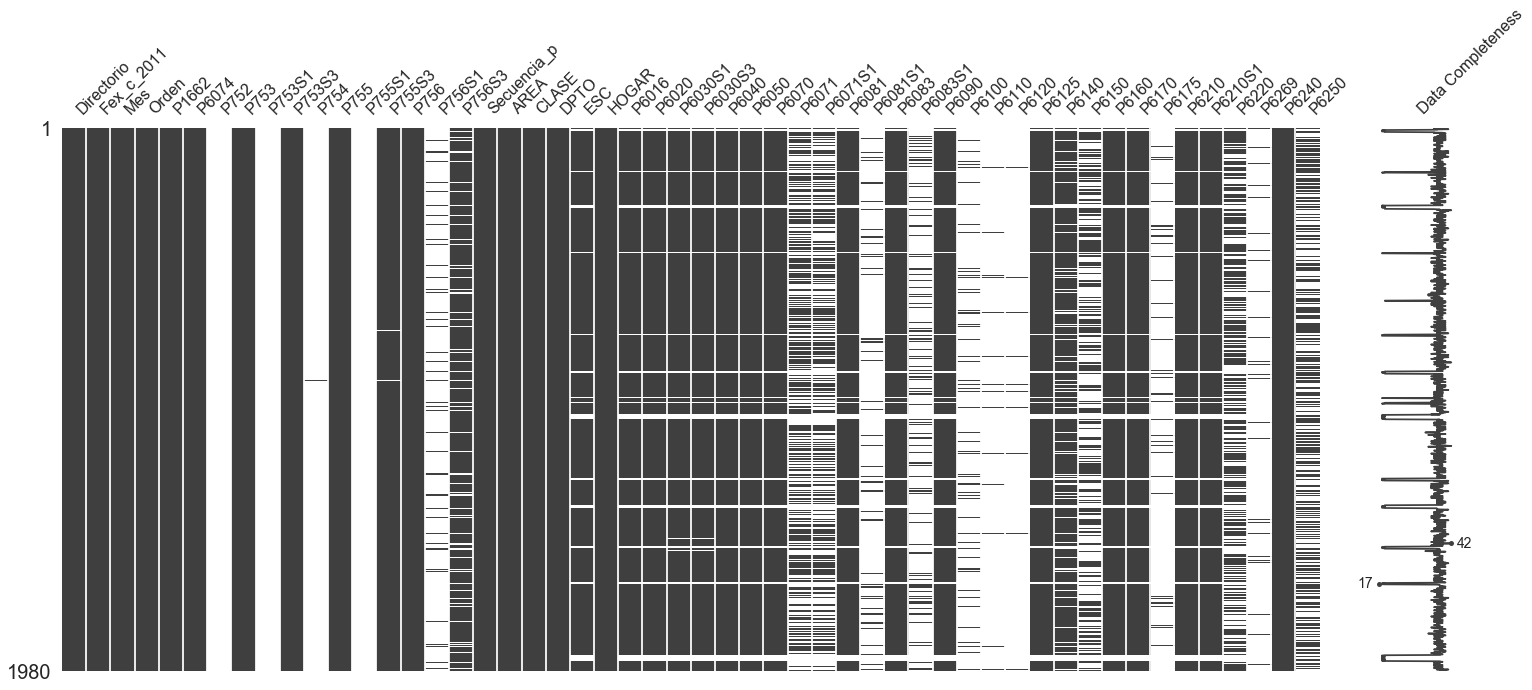

In [41]:
# Use Missingno to visualize the missing data
msno.matrix(ven_df, labels=True)

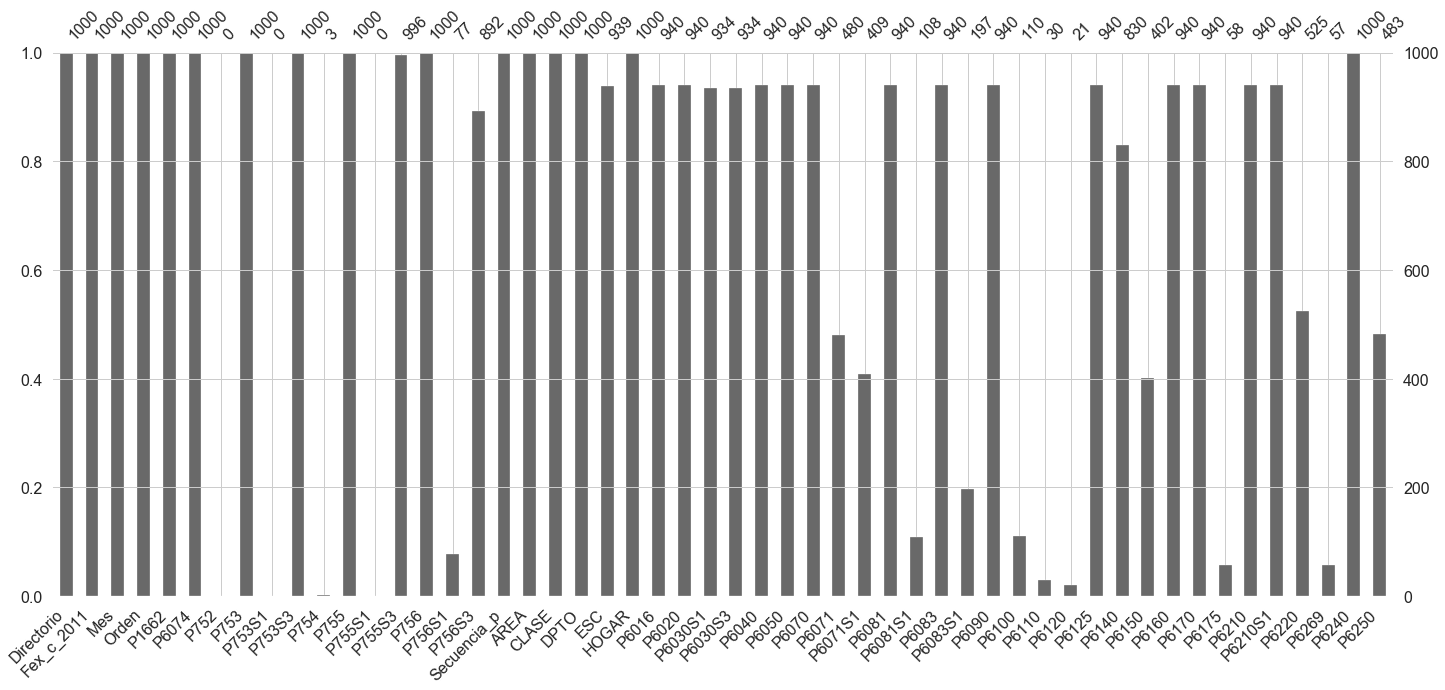

In [42]:
msno.bar(ven_df.sample(1000), labels=True)

Based on the above, it appears that we might want to explore dropping rows in addition to dropping a few columns. We can see that after `HOGAR` we are missing data for the almost all of the remaining variables, some appearing to have missing data that is standardized and possible correlated with other variables.

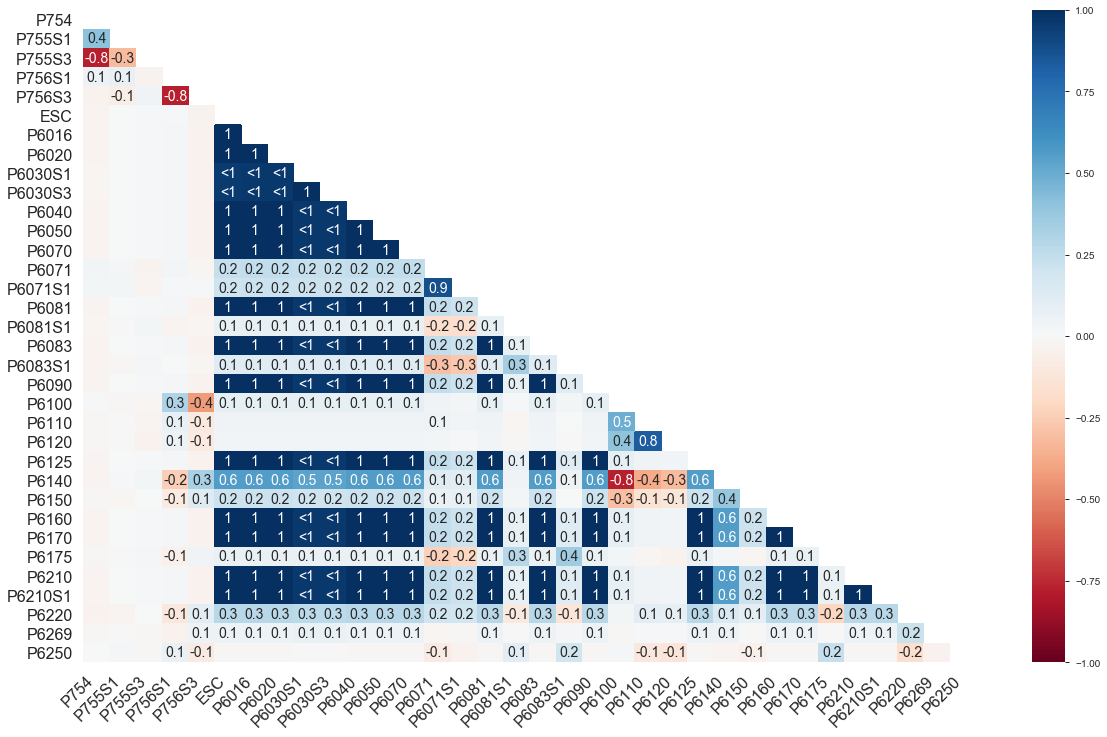

In [43]:
# missingno heatmap to see correlation between variables
msno.heatmap(ven_df)

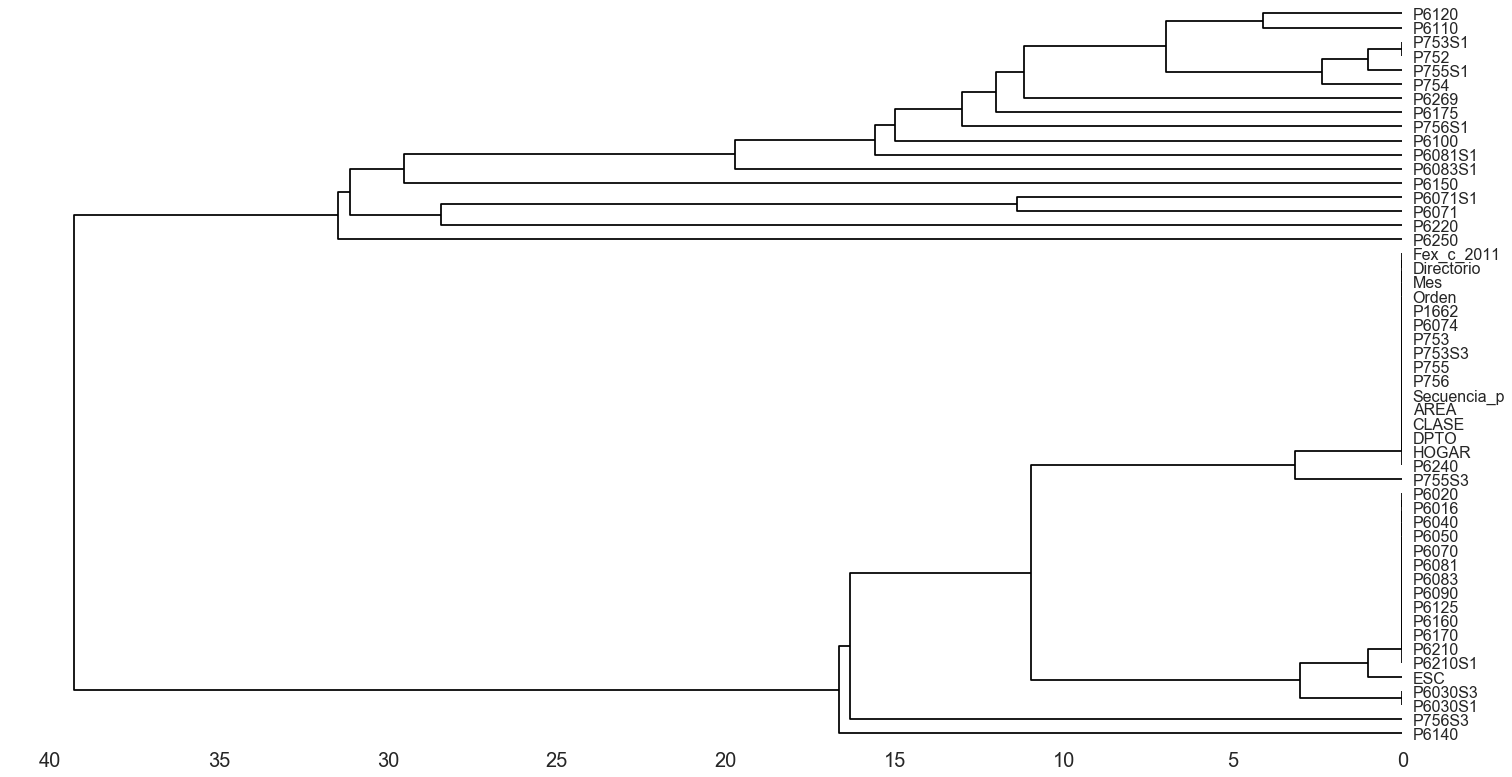

In [44]:
msno.dendrogram(ven_df)

The above heatmap and dendrogram confirm what is likely a common issue in working with survey data - that there are often many missing values due to skip patterns in the survey logic. Let's explore more closely to understand which variables we should drop entirely and which we should keep.

### Round 1 - Dropping Variables w/ Justification

We're going to look at the highest offenders (columns with a high amount of null values) and determine which ones we should drop entirely from our data. Because this is survey data, there are going to be many null values, as most surveys are designed to skip certain questions depending on how the respondent answers a previous question. For instance, if the respondent answered that they've never been to school, then they won't be asked the question of what was the highest level of education they completed. We will examine the question and the logic behind the question (dependencies on how they answer to other questions) and from there decide whether we can use the data and deal with the nulls, or if we already have the categorical information available on the topic in the form of another question.

In [45]:
# Dataframe of missing values sorted by the percentage missing per columns (only 36 cols with nulls)
missing_value_df.head(36)

,columns_name,percent_missing
P752,P752,100.000000
P753S1,P753S1,100.000000
P755S1,P755S1,99.949495
P754,P754,99.696970
P6120,P6120,98.030303
P6110,P6110,97.171717
P6269,P6269,94.393939
P6175,P6175,94.040404
P756S1,P756S1,93.080808
P6081S1,P6081S1,90.000000


Below are the variables that we've decided to drop and the corresponding justification:
1. `P752`: *The place where you lived 12 months ago (state capital or rural area)* This question is not relevant to our subset of respondents because we're focused on respondents who were living in Venezuela 12 months ago, not in the state where the survey was conducted.
- `P753S1`: *What Colombian state did you live in 12 months ago?* This question is all null because it was not asked to our subset of respondents who already confirmed that they lived in another country 12 months ago.
- `P755S1`: *What Colombian state did you live in 5 years ago?* This question is mostly null because it was not asked to our subset of respondents, who were mostly living in another country (as confirmed by another question).
- `P754`: *The place where you lived 5 years ago (state capital or rural area)* This question is not relevant to our subset of respondents because we're focused on respondents who were living in Venezuela 12 months ago, not in the state where the survey was conducted.
- `P6120`: *How much is paid or how much is discounted each month (for health social security affiliation)* Respondents are not asked this question if they confirm that their employer pays for this entirely, that it's a benefit with no cost to the respondent, or that they don't know the answer when asked "Who pays monthly for this social security health affiliation." We will remove this question since it we only have data for less than 2% of the respondents and there are other variables that provide the categorical information regarding affiliation to social security health services.
- `P6110`: *Who pays monthly for the social security health services affiliation* This question is only asked to respondents who indicated that they are a beneficiary of a social security health service. Since almost 98% of our respondents are not beneficiaries, we will remove this variable. Categorical data identifying beneficiaries is already provided in another variable.
- `P6269`: *Did you graduate from a normal superior school (asked to respondents who only completed high school)*  This school type is specific to Colombia, which wouldn't apply to our Venezuelan respondents. Plus school level is already provided in a separate variable.
- `P6175`: *Filtered on respondents who stated that they are currently going to school, this variable asks if the place they currently attend school is an official establishment* only 5% of respondents were asked this, and it does not add much value considering we already ask if they are currently in school, college or university.
- `P756S1`: *Which Colombian state was __ born?* Most of our subset of respondent were not asked this question because they already confirmed that they were born in another country.
- `P6081S1`: *This variable identifies the number (order) of the father, if they live in the household.* Since we already capture whether or not the father lives in the residence, this particular variable does not add additional information.
- `P6100`: *To which of the following social security health services are you affiliated.* Since this is only asked of respondents who already confirmed whether or not they are affiliated/beneficiaries of social security health services, this question does not add much information, considering only 9% of the respondents were asked this question.
- `P6083S1`: *same as `P6081S1` but for the mother.*
- `P6071S1`: *same as above, but for the partner.*
- `P6150`: *How many months has it been that you've been unaffiliated with the social security health services (that they previously had).* We already capture if they are or are not affiliated with the social security health services and if they have been affiliated in the past. This does not add any additional categorical information then what we already have.
- `P6071`: *Does the partner live in this household?* This question is only asked to respondents who confirmed that they are married and/or have a partner, which accounts for less than half of the respondents. Since we already know their marriage status, this particular variable does not add any information and cannot be transformed into anything that would add value.
- `P6250`: *In addition to the question before (what was the main activity that took up the majority of your time in the previous week), did you perform any paid activities for one hour or more?* This is only asked of respondents who indicated that their primary activity the previous week was work or that they are permanently incapacitated/cannot work. Since we already know if the respondent is employed or not, this question does not add much categorical information, especially since the majority of respondents (876) responded saying "No".
- `P6220` *What is the highest title/diploma you received?* We already know the highest level of education that the respondent completed, so this variable does not add much information.

The rest, that have below 20% null values, we will explore in the second round.

In [46]:
# Drop the above 17 variables
vars_to_drop = ['P752', 'P753S1', 'P755S1', 'P754', 'P6120', 'P6110', 'P6269', 'P6175', 'P756S1', 
                'P6081S1', 'P6100', 'P6083S1', 'P6071S1', 'P6150', 'P6250', 'P6071', 'P6220']
ven_df = ven_df.drop(vars_to_drop, axis=1)
ven_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1979
Data columns (total 35 columns):
Directorio     1980 non-null float64
Fex_c_2011     1980 non-null float64
Mes            1980 non-null object
Orden          1980 non-null float64
P1662          1980 non-null object
P6074          1980 non-null object
P753           1980 non-null category
P753S3         1980 non-null object
P755           1980 non-null category
P755S3         1970 non-null category
P756           1980 non-null float64
P756S3         1762 non-null object
Secuencia_p    1980 non-null float64
AREA           1980 non-null category
CLASE          1980 non-null category
DPTO           1980 non-null object
ESC            1860 non-null float64
HOGAR          1980 non-null float64
P6016          1861 non-null float64
P6020          1861 non-null category
P6030S1        1852 non-null float64
P6030S3        1852 non-null float64
P6040          1861 non-null float64
P6050          1861 non-null category
P607

In [47]:
ven_df.isnull().sum()

Directorio       0
Fex_c_2011       0
Mes              0
Orden            0
P1662            0
P6074            0
P753             0
P753S3           0
P755             0
P755S3          10
P756             0
P756S3         218
Secuencia_p      0
AREA             0
CLASE            0
DPTO             0
ESC            120
HOGAR            0
P6016          119
P6020          119
P6030S1        128
P6030S3        128
P6040          119
P6050          119
P6070          119
P6081          119
P6083          119
P6090          119
P6125          119
P6140          336
P6160          119
P6170          119
P6210          119
P6210S1        119
P6240            0
dtype: int64

### Round 2 - Visualizing the NaNs

We have 35 columns left, with 19 columns that still contain null values. Let's use missingno again to explore them further.

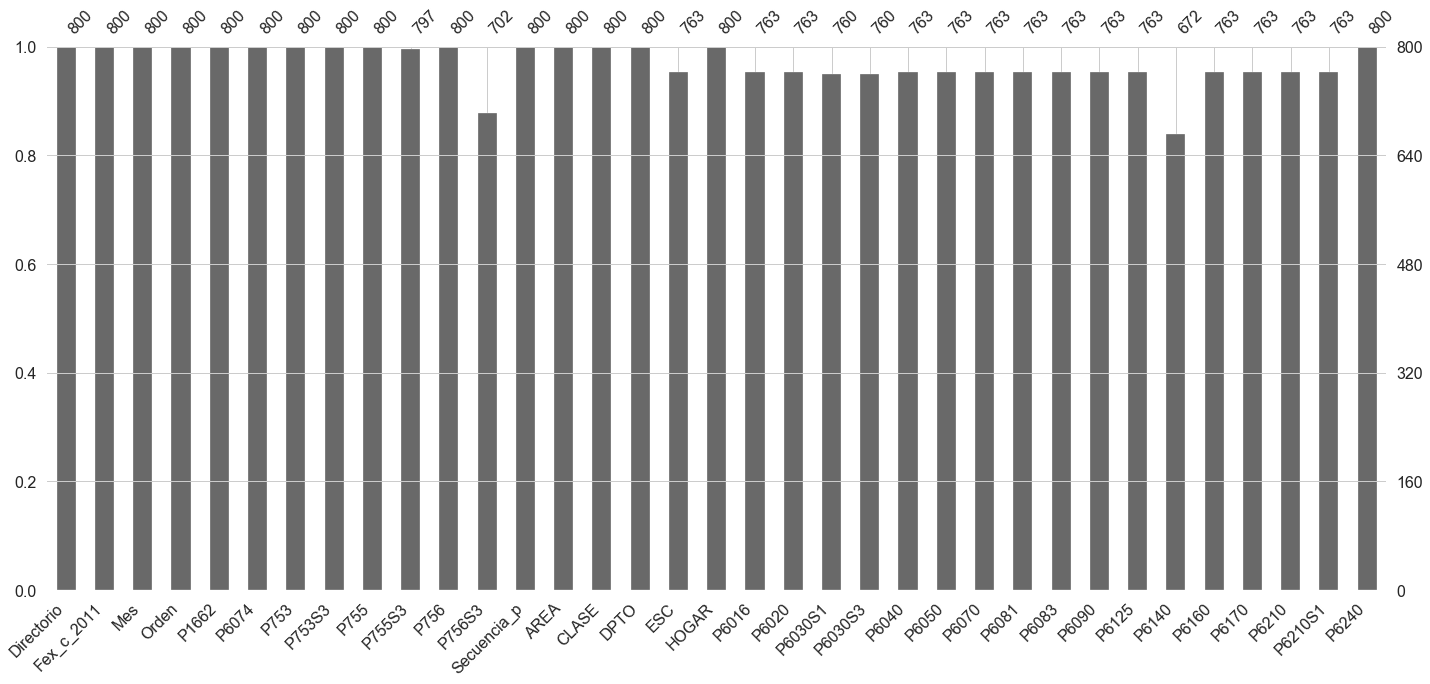

In [48]:
msno.bar(ven_df.sample(800))

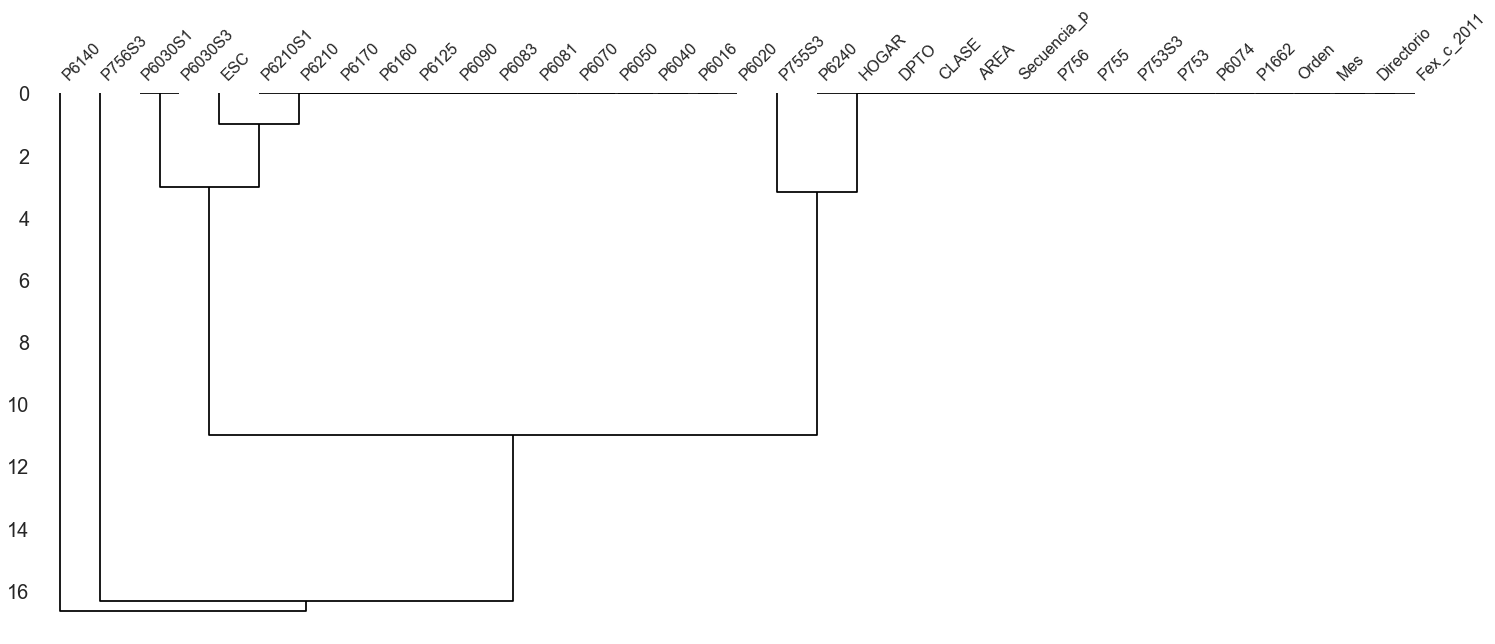

In [49]:
msno.dendrogram(ven_df)

In [50]:
ven_df.isnull().sum()

Directorio       0
Fex_c_2011       0
Mes              0
Orden            0
P1662            0
P6074            0
P753             0
P753S3           0
P755             0
P755S3          10
P756             0
P756S3         218
Secuencia_p      0
AREA             0
CLASE            0
DPTO             0
ESC            120
HOGAR            0
P6016          119
P6020          119
P6030S1        128
P6030S3        128
P6040          119
P6050          119
P6070          119
P6081          119
P6083          119
P6090          119
P6125          119
P6140          336
P6160          119
P6170          119
P6210          119
P6210S1        119
P6240            0
dtype: int64

In [51]:
# Let's isolate our remaining null values to investigate further
nullcols_r2 = ven_df.columns[(ven_df.isnull().sum()/ len(ven_df))>0]
len(nullcols_r2)
nullcols_r2

19

Index(['P755S3', 'P756S3', 'ESC', 'P6016', 'P6020', 'P6030S1', 'P6030S3',
       'P6040', 'P6050', 'P6070', 'P6081', 'P6083', 'P6090', 'P6125', 'P6140',
       'P6160', 'P6170', 'P6210', 'P6210S1'],
      dtype='object')

There are a number of columns that appear to have the same number of missing values, which is perhaps indicative of some subset of respondents who were excluded from certain questions. We will start by examining the few columns that have a different number of NaNs: `P755S3`, `P756S3`, `P6140`.

### Round 2 - Imputing the NaNs

- `P6140` *Previously, were you a beneficiary of any social security health services?* This is only asked to respondents who said they are not currently affiliated/beneficiaries of a social security health service. This might be helpful information to retain so let's assign the NaNs to the "Don't Know/No Response" category.

In [52]:
ven_df.P6140.value_counts()

Sí                     830
No                     813
No sabe, no informa      1
Name: P6140, dtype: int64

In [53]:
# Fill the null values with "No sabe, no informa" because this is means Don't Know/No response 
ven_df.P6140.fillna('No sabe, no informa', inplace=True)
ven_df.P6140.isnull().sum()

0

- `P755S3`: *In which country was ___ living 5 years ago?* This question is not asked of household members who are less than 5 years old. We will impute the nulls using the .mode() method.

In [54]:
ven_df['P755S3'].value_counts(normalize=True)

Venezuela         0.998985
Otro pais         0.000508
Ecuador           0.000508
Perú              0.000000
Panamá            0.000000
Italia            0.000000
Francia           0.000000
Estados Unidos    0.000000
España            0.000000
Costa Rica        0.000000
Argentina         0.000000
Name: P755S3, dtype: float64

In [55]:
#Use mode to fillna bc NaNs represent children <5 
ven_df.P755S3.fillna(ven_df.P755S3.mode().iloc[0], inplace=True)
ven_df.P755S3.isnull().sum()

0

- `P756S3`: *In which country was ___ born?* Similarly to above, this question is not asked of household members who are under 5 years old. We will impute the nulls using the .mode() method.

In [56]:
ven_df.P756S3.fillna(ven_df.P756S3.mode().iloc[0], inplace=True)
ven_df.P756S3.isnull().sum()

0

In [57]:
ven_df.isnull().sum()

Directorio       0
Fex_c_2011       0
Mes              0
Orden            0
P1662            0
P6074            0
P753             0
P753S3           0
P755             0
P755S3           0
P756             0
P756S3           0
Secuencia_p      0
AREA             0
CLASE            0
DPTO             0
ESC            120
HOGAR            0
P6016          119
P6020          119
P6030S1        128
P6030S3        128
P6040          119
P6050          119
P6070          119
P6081          119
P6083          119
P6090          119
P6125          119
P6140            0
P6160          119
P6170          119
P6210          119
P6210S1        119
P6240            0
dtype: int64

### Round 3 - Dropping Rows

 Now let's examine the remaining columns with NaNs which are all around 119 to 128 null values per category.

In [58]:
nullcols_r3 = ven_df.columns[ven_df.isna().any()].tolist()
for k in full_meta_dict:
    if k in nullcols_r3:
        print(k, full_meta_dict[k])

P6016 Número de orden de la persona que proporciona la información
P6020 Sexo
P6030S1 Mes (mm):
P6030S3 Año (aaaa):
P6040 ¿cuántos años cumplidos tiene...? (si es menor de 1 año, escriba 00)
P6050 ¿cuál es el parentesco de ... Con el jefe o jefa del hogar?
P6070 Actualmente:
P6081 ¿El padre de ... reside en este hogar?
P6083 ¿La madre de ... reside en este hogar?
P6090 ¿... Está afiliado, es cotizante o es beneficiario de alguna entidad de seguridad social en salud?
P6125 ¿en los últimos doce meses dejó de asistir al médico o no se hospitalizó, por no tener con que pagar estos servicios en la eps o ars?
P6160 ¿sabe leer y escribir?
P6170 ¿actualmente ... Asiste a la escuela, colegio o universidad?
P6210 ¿cuál es el nivel educativo más alto alcanzado por ... Y el último año o grado aprobado en este nivel?
P6210S1 Grado
ESC Escolaridad


Each of the above is household roster and basic demo information which likely wouldn't be asked of household members below a certain age. These are important variables to retain so we will drop the rows that are missing this data.

In [59]:
# Drop all rows with remaining NaNs
ven_df.dropna(inplace=True)
ven_df.isnull().sum()
ven_df.shape

Directorio     0
Fex_c_2011     0
Mes            0
Orden          0
P1662          0
P6074          0
P753           0
P753S3         0
P755           0
P755S3         0
P756           0
P756S3         0
Secuencia_p    0
AREA           0
CLASE          0
DPTO           0
ESC            0
HOGAR          0
P6016          0
P6020          0
P6030S1        0
P6030S3        0
P6040          0
P6050          0
P6070          0
P6081          0
P6083          0
P6090          0
P6125          0
P6140          0
P6160          0
P6170          0
P6210          0
P6210S1        0
P6240          0
dtype: int64

(1851, 35)

In [60]:
ven_df.shape

(1851, 35)

### Round 4 - Final Column drops: Survey ID data & Irrelevant Questions

Now that we are done with data merging, we can drop a few columns related to the survey/respondent identification since this is not relevant to the overall purposes of this project. Let's also quickly examine the remaining variables in case there are more that we can drop.

In [61]:
ven_df.columns

Index(['Directorio', 'Fex_c_2011', 'Mes', 'Orden', 'P1662', 'P6074', 'P753',
       'P753S3', 'P755', 'P755S3', 'P756', 'P756S3', 'Secuencia_p', 'AREA',
       'CLASE', 'DPTO', 'ESC', 'HOGAR', 'P6016', 'P6020', 'P6030S1', 'P6030S3',
       'P6040', 'P6050', 'P6070', 'P6081', 'P6083', 'P6090', 'P6125', 'P6140',
       'P6160', 'P6170', 'P6210', 'P6210S1', 'P6240'],
      dtype='object')

In [62]:
# Drop survey identification data that is not informative to the classification task
ven_df.drop(['Directorio', 'Fex_c_2011', 'Secuencia_p', 'HOGAR'], axis=1, inplace=True)

In [63]:
# Drop vars on where they lived 12 months ago since we subset for those living in Venezuela already
ven_df.drop(['P753', 'P753S3'], axis=1, inplace=True)

In [64]:
# print variable labels (survey questions)
for k in ven_df.columns:
    print(k, full_meta_dict.get(k))

Mes Mes
Orden ORDEN
P1662 ¿Cuál fue el principal motivo por el que …. Cambió el lugar donde residia hace 12 meses?
P6074 ¿…….. siempre ha vivido en este  municipio?
P755 ¿Dónde vivía …. , hace cinco años?
P755S3 ¿Dónde vivía …. , hace cinco años?  En otro pais
P756 Dónde nació…..:
P756S3 En otro país:
AREA Area
CLASE Clase
DPTO Departamento
ESC Escolaridad
P6016 Número de orden de la persona que proporciona la información
P6020 Sexo
P6030S1 Mes (mm):
P6030S3 Año (aaaa):
P6040 ¿cuántos años cumplidos tiene...? (si es menor de 1 año, escriba 00)
P6050 ¿cuál es el parentesco de ... Con el jefe o jefa del hogar?
P6070 Actualmente:
P6081 ¿El padre de ... reside en este hogar?
P6083 ¿La madre de ... reside en este hogar?
P6090 ¿... Está afiliado, es cotizante o es beneficiario de alguna entidad de seguridad social en salud?
P6125 ¿en los últimos doce meses dejó de asistir al médico o no se hospitalizó, por no tener con que pagar estos servicios en la eps o ars?
P6140 ¿anteriormente estuvo ..

Based on the above, let's sense check the following variables to determine if they are worth retaining: 
1. `P6074`
- `CLASE`
- `P6030S1` 
- (`P755`, `P755S3`)
- (`P756`, `P756S3`) 
- (`P6030S3` or `P6040`)

In [65]:
# Question: Has __ always lived in this municipality?
ven_df.P6074.value_counts()

No     1213
2.0     629
1.0       5
Si        4
Name: P6074, dtype: int64

The above variable has some value relabeling needs, however we are going to drop this column anyways since we know that the subset of data we selected (respondents who confirmed that they were living in Venezuela 12 months ago) should categorically answer "No" to this question of "Has ___ always lived in this municipality."

In [66]:
ven_df.drop('P6074', axis=1, inplace=True)

In [67]:
# Drop CLASE because all our data is labeled Urban
ven_df.drop('CLASE', axis=1, inplace=True)

In [68]:
# Month in which respondent or HH member was born - not needed
ven_df.drop('P6030S1', axis=1, inplace=True)

In [69]:
# Examine the answer breakdowns for rest
print(full_meta_dict.get('P755'))
ven_df.P755.value_counts()
print('------------------------\n')
print(full_meta_dict.get('P755S3'))
ven_df.P755S3.value_counts()


¿Dónde vivía …. , hace cinco años?


4.0                  1842
No había nacido         4
En este municipio       4
En otro municipio       1
Name: P755, dtype: int64

------------------------

¿Dónde vivía …. , hace cinco años?  En otro pais


Venezuela         1849
Otro pais            1
Ecuador              1
Perú                 0
Panamá               0
Italia               0
Francia              0
Estados Unidos       0
España               0
Costa Rica           0
Argentina            0
Name: P755S3, dtype: int64

In [70]:
# Replace blank values in dataframe with NaNs - as should have been done earlier on!
ven_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

ven_df.isnull().sum()

Mes        0
Orden      0
P1662      0
P755       0
P755S3     0
P756       0
P756S3     0
AREA       0
DPTO       0
ESC        0
P6016      0
P6020      0
P6030S3    0
P6040      0
P6050      0
P6070      0
P6081      0
P6083      0
P6090      0
P6125      0
P6140      0
P6160      0
P6170      0
P6210      0
P6210S1    0
P6240      0
dtype: int64

From the above we can see that under `P755S1` there are 1850 values that are totally blank that we have now replaced with NaNs. **Lesson Learned** we should have checked for blank values and replaced them as null values. In this case, as with `P756S1`, which also has a many blank values, we are going to drop the columns entirely anyways.

In [71]:
print(full_meta_dict.get('P756'))
ven_df.P756.value_counts()
print('------------------------\n')
print(full_meta_dict.get('P756S3'))
ven_df.P756S3.value_counts()


Dónde nació…..:


3.0    1641
2.0     130
1.0      80
Name: P756, dtype: int64

------------------------

En otro país:


Venezuela    1848
Otro pais       2
Perú            1
Name: P756S3, dtype: int64

In [72]:
# Age vars
print(full_meta_dict.get('P6030S3'))
ven_df.P6030S3.head()
print('------------------------\n')
print(full_meta_dict.get('P6040'))
ven_df.P6040.head()

Año (aaaa):


0    1952.0
1    1937.0
2    1992.0
3    1991.0
4    1992.0
Name: P6030S3, dtype: float64

------------------------

¿cuántos años cumplidos tiene...? (si es menor de 1 año, escriba 00)


0    66.0
1    81.0
2    26.0
3    27.0
4    26.0
Name: P6040, dtype: float64

In [73]:
# Drop columns per rational below, to deal with multicollinearity
ven_df.drop(['P755', 'P756S3', 'P6030S3'], axis=1, inplace=True)

Action and rationale:
- `P6074` - dropped because answer is and should mostly be "No" to the question of whether or not the respondent has always lived in this municipality.
- `P755S3` and `P755`: We will drop `P755` because 99% of the answers state that they lived in another country when asked this question (as opposed to living in the city or another Colombian city). `P755S3` is the follow-up question to ask which country they lived in 5 years ago.
- `P756S3` and `P756`: We will drop `P756S3` because this question is asking in which country they were born, whereas `P756` is asking if they were born in the current city, another state, or another country - providing us with more information compared to `P756S3` in this case.
- `CLASE` - we will drop because this is an Urban or Rural classification however all of our data is confirmed as Urban.
- `P6030S1` - let's drop this because we will just retain one variable on age (this is the month they were born).
- `P6040` and `P6030S3`: We will keep `P6040` because this provides the direct age for each respondent, whereas `P6030S3` provides the year of birth, which, although they theoretically provide the same information, it appears respondents had an easier time providing their age in years rather than recalling year of birth for some household members (there were less nulls for `P6040`).

## Check Data Types and Proper Value Labels

In this data, we have both numerical and many categorical variables. We saw earlier that some of the variables did not properly import the value labels, meaning we should check that all labels are correct before conducting ordinal label encoding and then one-hot encoding. But first let's determine that are data types are correct.

In [74]:
for col in ven_df.columns:
    if col in full_meta_dict:
        print(col, full_meta_dict.get(col))

Mes Mes
Orden ORDEN
P1662 ¿Cuál fue el principal motivo por el que …. Cambió el lugar donde residia hace 12 meses?
P755S3 ¿Dónde vivía …. , hace cinco años?  En otro pais
P756 Dónde nació…..:
AREA Area
DPTO Departamento
ESC Escolaridad
P6016 Número de orden de la persona que proporciona la información
P6020 Sexo
P6040 ¿cuántos años cumplidos tiene...? (si es menor de 1 año, escriba 00)
P6050 ¿cuál es el parentesco de ... Con el jefe o jefa del hogar?
P6070 Actualmente:
P6081 ¿El padre de ... reside en este hogar?
P6083 ¿La madre de ... reside en este hogar?
P6090 ¿... Está afiliado, es cotizante o es beneficiario de alguna entidad de seguridad social en salud?
P6125 ¿en los últimos doce meses dejó de asistir al médico o no se hospitalizó, por no tener con que pagar estos servicios en la eps o ars?
P6140 ¿anteriormente estuvo ... Afiliado, fue cotizante o beneficiario de alguna entidad de seguridad social en salud?
P6160 ¿sabe leer y escribir?
P6170 ¿actualmente ... Asiste a la escuela,

In [75]:
ven_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851 entries, 0 to 1979
Data columns (total 23 columns):
Mes        1851 non-null object
Orden      1851 non-null float64
P1662      1851 non-null object
P755S3     1851 non-null category
P756       1851 non-null float64
AREA       1851 non-null category
DPTO       1851 non-null object
ESC        1851 non-null float64
P6016      1851 non-null float64
P6020      1851 non-null category
P6040      1851 non-null float64
P6050      1851 non-null category
P6070      1851 non-null category
P6081      1851 non-null category
P6083      1851 non-null category
P6090      1851 non-null category
P6125      1851 non-null category
P6140      1851 non-null category
P6160      1851 non-null category
P6170      1851 non-null category
P6210      1851 non-null category
P6210S1    1851 non-null float64
P6240      1851 non-null category
dtypes: category(14), float64(6), object(3)
memory usage: 173.1+ KB


In [76]:
# Change Orden to str type because these are not intended as numerical data
ven_df['P756'] = ven_df['Orden'].astype(str)
ven_df['P756'] = ven_df['P756'].astype(str)
ven_df['P6016'] = ven_df['P6016'].astype(str)
ven_df['P6210S1'] = ven_df['P6210S1'].astype(str)

Now that we have the proper data types, let's move onto checking that the value labels for all categorical data are correct.

We will check each variable above and only highlight the problematic ones that will need to be relabeled.

In [77]:
ven_df.P1662.value_counts()

Trabajo                                                         566
Acompañar a otros miembros del  hogar                           440
10.0                                                            378
Amenaza o riesgo para su vida o integridad física por violen    328
Amenaza o riesgo para su vida o integridad física ocasionada     72
Conformación de un nuevo hogar                                   29
Salud                                                            19
Estudio                                                          15
Motivos culturales asociados a grupos étnicos                     4
Name: P1662, dtype: int64

From the above, we can see that answer value "10" is not correct. Let's look at the metadata container for this variable to find what is missing. 

In [78]:
jan_mm_meta.variable_value_labels['P1662']

{1.0: 'Trabajo',
 2.0: 'Estudio',
 3.0: 'Salud',
 4.0: 'Amenaza o riesgo para su vida o integridad física ocasionada',
 5.0: 'Amenaza o riesgo para su vida o integridad física por violen',
 6.0: 'Desastres naturales',
 7.0: 'Conformación de un nuevo hogar',
 8.0: 'Acompañar a otros miembros del  hogar',
 9.0: 'Motivos culturales asociados a grupos étnicos'}

As we can see above, the missing answer label is "6:0 Desastres naturales." We will replace the answer code in our data now.

In [79]:
ven_df.P1662 = ven_df.P1662.replace(10.0, "Desastres naturales", regex=True)
ven_df.P1662.value_counts()

Trabajo                                                         566
Acompañar a otros miembros del  hogar                           440
Desastres naturales                                             378
Amenaza o riesgo para su vida o integridad física por violen    328
Amenaza o riesgo para su vida o integridad física ocasionada     72
Conformación de un nuevo hogar                                   29
Salud                                                            19
Estudio                                                          15
Motivos culturales asociados a grupos étnicos                     4
Name: P1662, dtype: int64

In [80]:
ven_df.AREA.value_counts()

Cúcuta AM          191
Medellín AM        173
Santa Marta        162
Barranquilla AM    162
                   148
Bucaramanga AM     140
Riohacha           117
Valledupar         111
Sincelejo          108
Cartagena          106
Pereira AM          69
Villavicencio       65
Tunja               62
Cali AM             59
Armenia             51
Popayán             33
Ibagué              31
Manizales AM        23
Montería            14
Florencia           11
Pasto                6
Neiva                5
Quibdó               4
Bogotá DC            0
Name: AREA, dtype: int64

In [81]:
jan_cg_meta.variable_value_labels['AREA']

{'05': 'Medellín AM',
 '08': 'Barranquilla AM',
 '11': 'Bogotá DC',
 '13': 'Cartagena',
 '15': 'Tunja',
 '17': 'Manizales AM',
 '18': 'Florencia',
 '19': 'Popayán',
 '20': 'Valledupar',
 '23': 'Montería',
 '27': 'Quibdó',
 '41': 'Neiva',
 '44': 'Riohacha',
 '47': 'Santa Marta',
 '50': 'Villavicencio',
 '52': 'Pasto',
 '54': 'Cúcuta AM',
 '63': 'Armenia',
 '66': 'Pereira AM',
 '68': 'Bucaramanga AM',
 '70': 'Sincelejo',
 '73': 'Ibagué',
 '76': 'Cali AM'}

It appears that there are blank values in our `AREA` variable, which somehow didn't get marked or replaces as NaNs. After some digging into the survey methodology, it appears that `AREA` is not relevant to all respondents, as it refers to Metropolitan Areas. Given this, we will change the blank values to a new category - 'NotAM"

In [82]:
ven_df['AREA'] = ven_df['AREA'].replace('', value='NotAM')

## Identifying Features and Target

In [83]:
ven_df.columns

Index(['Mes', 'Orden', 'P1662', 'P755S3', 'P756', 'AREA', 'DPTO', 'ESC',
       'P6016', 'P6020', 'P6040', 'P6050', 'P6070', 'P6081', 'P6083', 'P6090',
       'P6125', 'P6140', 'P6160', 'P6170', 'P6210', 'P6210S1', 'P6240'],
      dtype='object')

In [84]:
X = ven_df[['Mes', 'P755S3', 'P756', 'AREA', 'DPTO', 'ESC',
       'P6016', 'P6020', 'P6040', 'P6050', 'P6070', 'P6081', 'P6083', 'P6090',
       'P6125', 'P6140', 'P6160', 'P6170', 'P6210', 'P6210S1', 'P6240']].copy()
y = ven_df['P1662'].copy()
X.shape
y.shape

(1851, 21)

(1851,)

## Multicollinearity Check

Let's do a multicollinearity check before normalizing our numeric data and before one-hot encoding the categorical data. We do expect that there will be some variables that are correlated with each other because of the way surveys are designed.

In [85]:
X.corr()

,ESC,P6040
ESC,1.000000,-0.128999
P6040,-0.128999,1.000000


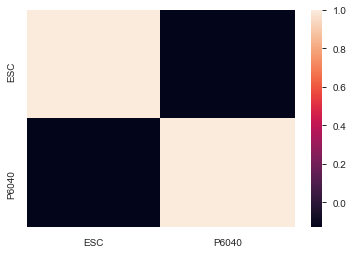

In [86]:
sns.heatmap(X.corr())

For the numerical data, multicollinearity does not appear to be a big issue, as we only have 2 numeric variables with very low correlations to each other.

# **Explore**


## Set aside Test Set

In order to avoid any data snooping bias, we will go ahead and create the test set to set aside, with a size of 20% of our entire dataset. 

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(1480, 21)

(1480,)

(371, 21)

(371,)

## Exploration Set-Up

We will continue doing more in-depth data exploration of the training set only. We will make a copy of the training set to avoid making any harmful changes to the original training set.

In [89]:
# Make copy of features and target variables from training data
feats = X_train.copy()
target = y_train.copy()

Let's also determine which are our truly categorical variables and which are the numerical ones.

In [90]:
# select data based on data type
categ_feats = feats.select_dtypes(exclude=['float64']).copy()
num_feats = feats.select_dtypes(['float64']).copy()

## Numeric Data EDA

In [91]:
num_feats.describe()

,ESC,P6040
count,1480.000000,1480.000000
mean,9.783108,30.709459
std,3.660119,13.522502
min,0.000000,12.000000
25%,7.000000,20.000000
50%,11.000000,27.000000
75%,11.000000,38.000000
max,21.000000,85.000000


The above are descriptive statistics on our numerical variables. We can see that the average age (`P6040`) is nearly 31, and the average years of education (`ESC`) is nearly 10 years. Let's take a look at their distributions.

(array([1, 2]), <a list of 2 Text xticklabel objects>)

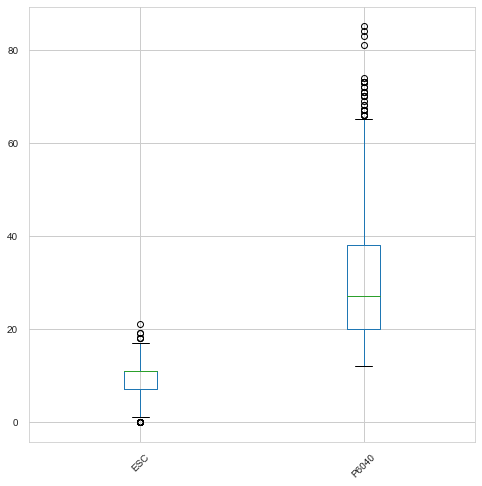

In [92]:
feats.boxplot(figsize=(8,8))
plt.xticks(rotation=45)

From the above, we can see that there are some definite outliers for `P6040` in particular, indicating that we have some much older respondents that are skewing the data. This makes sense because the subset of data we retained dropped any members that were 10 years or below.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c8309b0>,
      dtype=object)

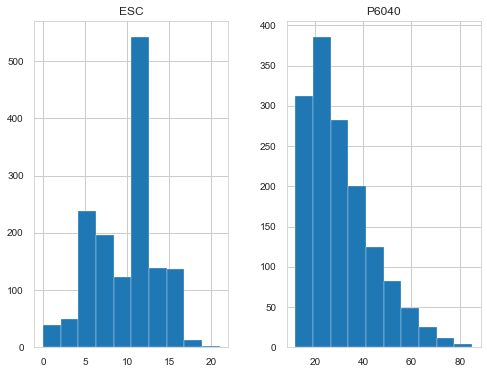

In [93]:
num_feats.hist(figsize=(8,6))

`P6040` (age in years) is skewed left (younger), while `ESC` (years of schooling) has a high peak but is overall more normally distributed.

Let's go ahead and use the Min Max Scaler to scale the numeric data.

### Scaling: MinMaxScaler

In [94]:
# build a simple pipeline for our data transformations to numeric data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), # Including this in case of NaNs in new data added to the model
    ('minmaxscaler', MinMaxScaler())
])

In [95]:
num_feats_tr = num_pipeline.fit_transform(num_feats)

## Categorical Data EDA

In [96]:
for cat in categ_feats.columns:
    print(cat, full_meta_dict.get(cat))

Mes Mes
P755S3 ¿Dónde vivía …. , hace cinco años?  En otro pais
P756 Dónde nació…..:
AREA Area
DPTO Departamento
P6016 Número de orden de la persona que proporciona la información
P6020 Sexo
P6050 ¿cuál es el parentesco de ... Con el jefe o jefa del hogar?
P6070 Actualmente:
P6081 ¿El padre de ... reside en este hogar?
P6083 ¿La madre de ... reside en este hogar?
P6090 ¿... Está afiliado, es cotizante o es beneficiario de alguna entidad de seguridad social en salud?
P6125 ¿en los últimos doce meses dejó de asistir al médico o no se hospitalizó, por no tener con que pagar estos servicios en la eps o ars?
P6140 ¿anteriormente estuvo ... Afiliado, fue cotizante o beneficiario de alguna entidad de seguridad social en salud?
P6160 ¿sabe leer y escribir?
P6170 ¿actualmente ... Asiste a la escuela, colegio o universidad?
P6210 ¿cuál es el nivel educativo más alto alcanzado por ... Y el último año o grado aprobado en este nivel?
P6210S1 Grado
P6240 ¿en que actividad ocupó ... La mayor parte de

In [97]:
categ_feats.head(10)

,Mes,P755S3,P756,AREA,DPTO,P6016,P6020,P6050,P6070,P6081,P6083,P6090,P6125,P6140,P6160,P6170,P6210,P6210S1,P6240
255,01,Venezuela,3.0,Santa Marta,Magdalena,3.0,Mujer,"Hijo(a), hijastro(a)",Esta casado (a),Fallecido,Sí,No,No,No,Sí,No,Básica secundaria (6o - 9o),9.0,Oficios del hogar
1172,02,Venezuela,2.0,NotAM,Meta,2.0,Mujer,"Pareja, esposo(a), cónyuge, compañero(a)",No esta casado (a) y vive en pareja hace dos ...,Fallecido,No,No,No,Sí,Sí,No,Básica secundaria (6o - 9o),8.0,Trabajando
1344,03,Venezuela,4.0,Medellín AM,Antioquia,4.0,Mujer,Otro no pariente,Esta soltero (a),No,No,No,No,Sí,Sí,No,Superior o universitaria,5.0,Trabajando
1323,02,Venezuela,2.0,Sincelejo,Sucre,2.0,Mujer,"Pareja, esposo(a), cónyuge, compañero(a)",No esta casado (a) y vive en pareja hace dos ...,Sí,Sí,No,No,Sí,Sí,No,Básica secundaria (6o - 9o),9.0,Oficios del hogar
1332,02,Venezuela,6.0,Sincelejo,Sucre,5.0,Hombre,Otro no pariente,Esta soltero (a),No,Sí,No,No,No,Sí,Sí,Básica secundaria (6o - 9o),8.0,Estudiando
602,01,Venezuela,1.0,Sincelejo,Sucre,1.0,Mujer,Jefe (a) del hogar,Esta separado (a) o divorciado (a),Fallecido,Fallecida,Sí,No,"No sabe, no informa",No,No,Ninguno,0.0,Oficios del hogar
1016,02,Venezuela,2.0,Santa Marta,Magdalena,2.0,Mujer,"Pareja, esposo(a), cónyuge, compañero(a)",No esta casado (a) y vive en pareja hace dos ...,No,No,No,No,No,Sí,No,Media (10o - 13o),11.0,Oficios del hogar
1012,02,Venezuela,5.0,Riohacha,La guajira,5.0,Hombre,"Hijo(a), hijastro(a)",Esta soltero (a),Fallecido,Sí,No,No,No,Sí,No,Básica primaria (1o - 5o),5.0,Otra actividad
869,02,Venezuela,2.0,Medellín AM,Antioquia,2.0,Mujer,"Pareja, esposo(a), cónyuge, compañero(a)",No esta casado (a) y vive en pareja hace dos ...,Fallecido,No,Sí,No,"No sabe, no informa",Sí,No,Media (10o - 13o),11.0,Oficios del hogar
1871,03,Venezuela,1.0,Santa Marta,Magdalena,1.0,Mujer,Jefe (a) del hogar,Esta separado (a) o divorciado (a),No,Fallecida,No,No,Sí,Sí,No,Básica secundaria (6o - 9o),6.0,Trabajando


Text(0.5, 1, 'Primary Activity by Gender')

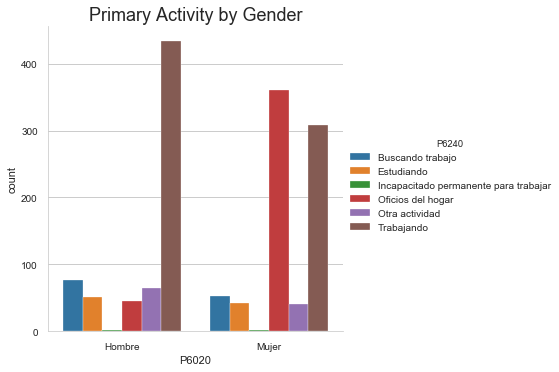

In [98]:
# bar plots of primary activity by gender
sns.catplot(x="P6020", hue="P6240", kind="count", data=categ_feats);
plt.title('Primary Activity by Gender', fontsize=18)

In the above, we can see that for men, the primary activity is largely work ('trabajando'), whereas for women household tasks is first followed by work.

/Users/serenaquiroga/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/serenaquiroga/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


Text(0.5, 1, 'Marital Status of Respondents')

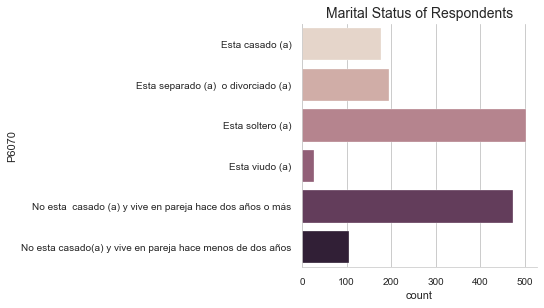

In [99]:
# bar plot of marital status of respondents
sns.catplot(y="P6070", kind="count", palette="ch:.15", data=categ_feats, size=4);
plt.title("Marital Status of Respondents", fontsize=14)

About 13% of respondents are divorced, and nearly just as many are married (12%), while roughly a third are single. Another 32% are not married but living with a partner of 2 or more years.

In [100]:
# Education breakdown
categ_feats.P6210.value_counts(normalize=True)

Media (10o - 13o)              0.359459
Básica secundaria (6o - 9o)    0.287838
Superior o universitaria       0.229054
Básica primaria (1o - 5o)      0.106757
Ninguno                        0.016892
Preescolar                     0.000000
No sabe, no informa            0.000000
Name: P6210, dtype: float64

Approximately 36% of respondents stated that high school (grades 10-13) was the highest level of education they completed, and about 23% completed college or university. For 11% of respondents, the highest level of education completed was basic primary (grades 1-5).

Text(0.5, 1.0, 'Relation to the Head of Household')

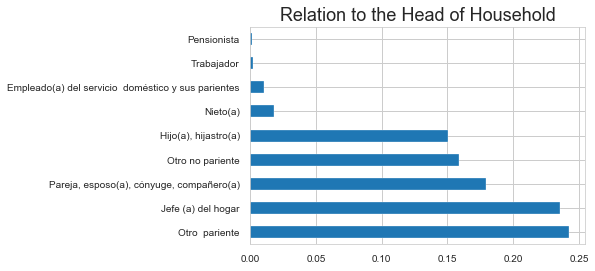

In [101]:
categ_feats.P6050.value_counts(normalize=True).plot(kind="barh")
plt.title('Relation to the Head of Household', fontsize=18)

Above we can see that nearly 25% of respondents are the head of household, nearly 25% are some other relative, ~18% are the partner/spouse, ~16% are not related to the head of the household, and 15% are the son or daughter to the head of household.

Text(0.5, 1.0, 'Respondents per Colombian State')

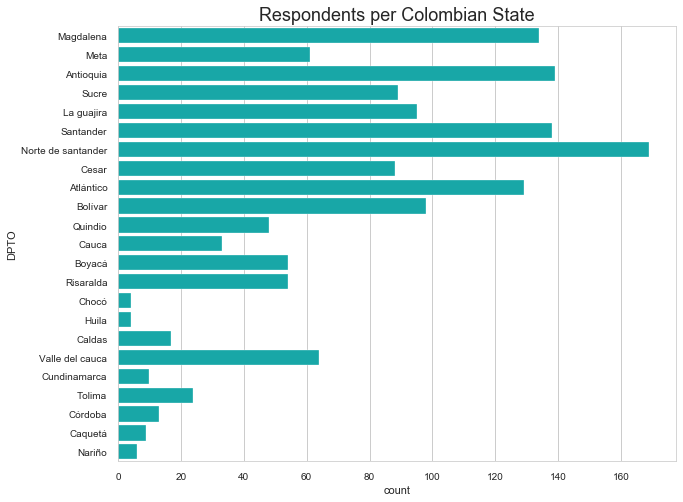

In [102]:
# bar plot of number of respondents per state
f, ax = plt.subplots(figsize=(10,8))
sns.countplot(y="DPTO", data=categ_feats, color="c")
plt.title('Respondents per Colombian State', fontsize=18)

Text(0.5, 1.0, 'Respondents per Metropolitan Areas')

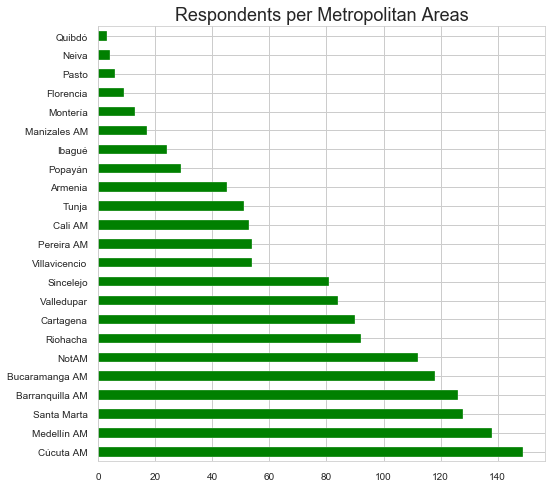

In [103]:
# bar plot of respondents per metro area
categ_feats.AREA.value_counts().plot(kind="barh", figsize=(8,8), color="g")
plt.title('Respondents per Metropolitan Areas', fontsize=18)

From the above, we can see that our data is not evenly spread across the `DPTO` (or state) and `AREA` (metro areas) categories. These might still be somewhat aligned with population sizes in each of these geographic areas, and/or it might reflect the prevalence of Venezuelan migrants in certain areas.

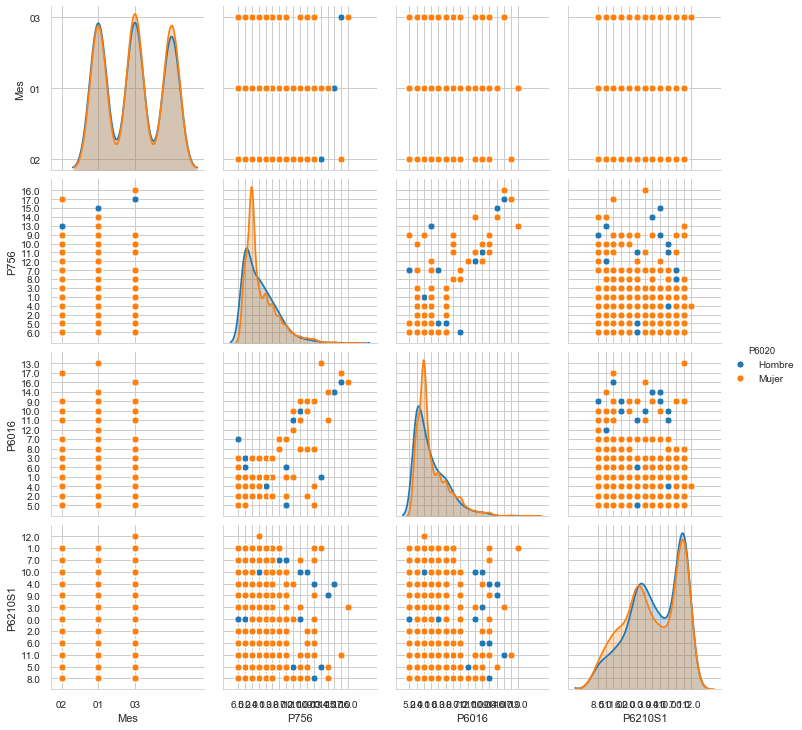

In [104]:
# plot the categorical variables with sex as a hue
sns.pairplot(categ_feats, hue='P6020')

## Transformations to Train & Test Set

Now we will convert our categorical data into dummy variables, dropping the first dummy to avoid the dummy trap.

In [105]:
# Convert categorical data into dummy variables
X_train_tr = pd.get_dummies(X_train, prefix_sep='_', drop_first=True)

Now let's apply the numerical data transformations using the MinMaxScaler. 

In [106]:
# Instantiate MinMaxScaler()
mms = MinMaxScaler()

In [107]:
# fit_transform to numerical data in  training set
X_train_tr[['ESC', 'P6040']] = mms.fit_transform(X_train_tr[['ESC', 'P6040']])

### Apply transformations to test set

For the MinMaxScaler, we must NOT call `fit_transform()` as we did with the training data, otherwise we would be fitting the test set and could result in data leakage.

In [108]:
# Convert categ data to dummies for test set, dropping first
X_test_tr = pd.get_dummies(X_test, prefix_sep='_', drop_first=True)

# perform MinMaxScaling to numerical data in test set
X_test_tr[['ESC', 'P6040']] = mms.transform(X_test_tr[['ESC', 'P6040']])

### Check that dummy variables align between training and test set

We are going to confirm that the variables int he test set, especially as have been created from making dummies of the categorical data, are available in the training data.

In [109]:
train_cols = list(X_train_tr.columns)
test_cols = list(X_test_tr.columns)

In [110]:
# Identify any columns that are in the test set but not in the training data
for col in test_cols:
    if col not in train_cols:
        print(col)

P756_19.0
P6016_19.0


In [111]:
for col in train_cols:
    if col not in test_cols:
        print(col)

P756_14.0
P756_15.0
P756_16.0
P756_17.0
AREA_Pasto
DPTO_Nariño
P6016_14.0
P6016_16.0
P6016_17.0
P6210S1_12.0


In [112]:
# Remove the identified columns from above
X_test_tr.drop(['P756_19.0', 'P6016_19.0'], axis=1, inplace=True)

In [113]:
X_train_tr.drop(['P756_14.0', 'P756_15.0', 'P756_16.0', 'P756_17.0', 'AREA_Pasto', 'DPTO_Nariño', 
                 'P6016_14.0', 'P6016_16.0', 'P6016_17.0', 'P6210S1_12.0'], axis=1, inplace=True)

## Replacing Labels for Target Variables

We are going to simplify the labels because they are currently lengthier text.

In [114]:
y_train.unique()

array(['Trabajo',
       'Amenaza o riesgo para su vida o integridad física por violen',
       'Acompañar a otros miembros del  hogar',
       'Amenaza o riesgo para su vida o integridad física ocasionada',
       'Desastres naturales', 'Conformación de un nuevo hogar', 'Salud',
       'Estudio', 'Motivos culturales asociados a grupos étnicos'],
      dtype=object)

In [115]:
y_train = y_train.replace({"Trabajo":"Work",
       "Amenaza o riesgo para su vida o integridad física por violen":"Threat/Risk of violence NOT Armed Conflict",
       "Acompañar a otros miembros del  hogar":"Accompany other household members",
       "Amenaza o riesgo para su vida o integridad física ocasionada":"Threat/Risk due to Armed Conflict",
       "Desastres naturales": "Natural Disaster", "Conformación de un nuevo hogar":"To make a new home", "Salud":"Health",
       "Estudio":"Studies", "Motivos culturales asociados a grupos étnicos":"Ethnic Group Cultural Reasons"})
y_train.unique()

array(['Work', 'Threat/Risk of violence NOT Armed Conflict',
       'Accompany other household members',
       'Threat/Risk due to Armed Conflict', 'Natural Disaster',
       'To make a new home', 'Health', 'Studies',
       'Ethnic Group Cultural Reasons'], dtype=object)

In [116]:
y_test = y_test.replace({"Trabajo":"Work",
       "Amenaza o riesgo para su vida o integridad física por violen":"Threat/Risk of violence NOT Armed Conflict",
       "Acompañar a otros miembros del  hogar":"Accompany other household members",
       "Amenaza o riesgo para su vida o integridad física ocasionada":"Threat/Risk due to Armed Conflict",
       "Desastres naturales": "Natural Disaster", "Conformación de un nuevo hogar":"To make a new home", "Salud":"Health",
       "Estudio":"Studies", "Motivos culturales asociados a grupos étnicos":"Ethnic Group Cultural Reasons"})

# **Model**

This is a mutli-class classification task since we have more than two classes and each sample is assigned to one and only one label given the structure of the survey and dataset. Even though in reality, we know that migrants can have more than one reason for migrating, we can think of this as identifying the primary driver/reason for their migration.

Additionally, we have a slightly imbalanced dataset. As visible below, within the training set we can see that roughly 30% of respondents indicated that **work** was the primary reason, whereas **studies, ethnic group cultural reasons, and health** combined appear to account for less than 5% of responses. 

We will start by making a baseline model using a Decision Tree Classifier, and then from there we will explore methods for addressing the imbalanced nature of the labels, while performing GridSearch on different classification models and their respective hyperparameters.

Text(0.5, 1.0, 'Train Set Labels: Imbalanced Labels')

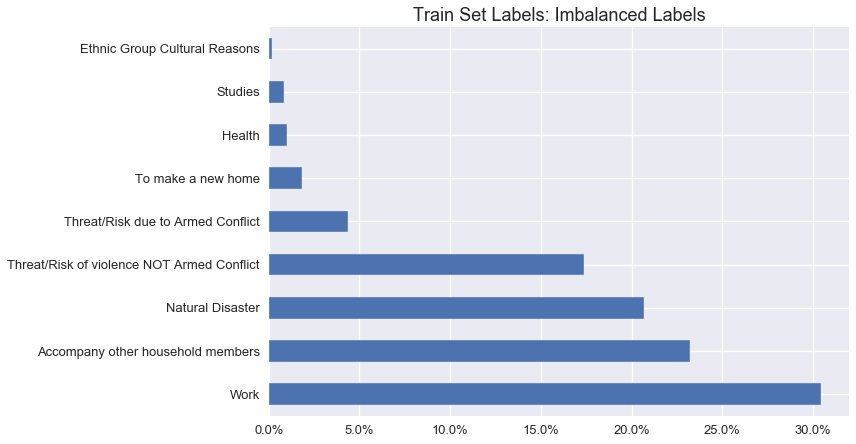

In [126]:
# Plot training labels to show class imbalance
with plt.style.context('seaborn-talk'):
    ax = y_train.value_counts(normalize=True).mul(100).plot(kind="barh")
    plt.title("Train Set Labels: Imbalanced Labels", fontsize=18)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())

Text(0.5, 1.0, 'Train Set Labels: Imblanced Labels')

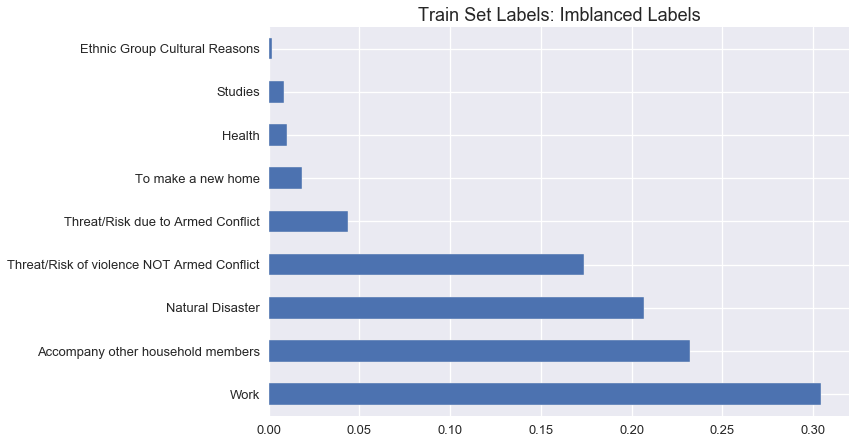

In [125]:
plt.style.use('seaborn-talk')
y_train.value_counts(normalize=True).plot(kind="barh")
plt.title("Train Set Labels: Imblanced Labels", fontsize=18)

## Baseline Model (BL)

We will begin by producing a baseline model before moving onto using pipelines to compare multiple classification techniques.


In [120]:
# Instantiate and fit a Decision Tree Classifier
clf_bl = DecisionTreeClassifier()
clf_bl.fit(X_train_tr, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Let's quickly look at the feature importance for the fitted model.

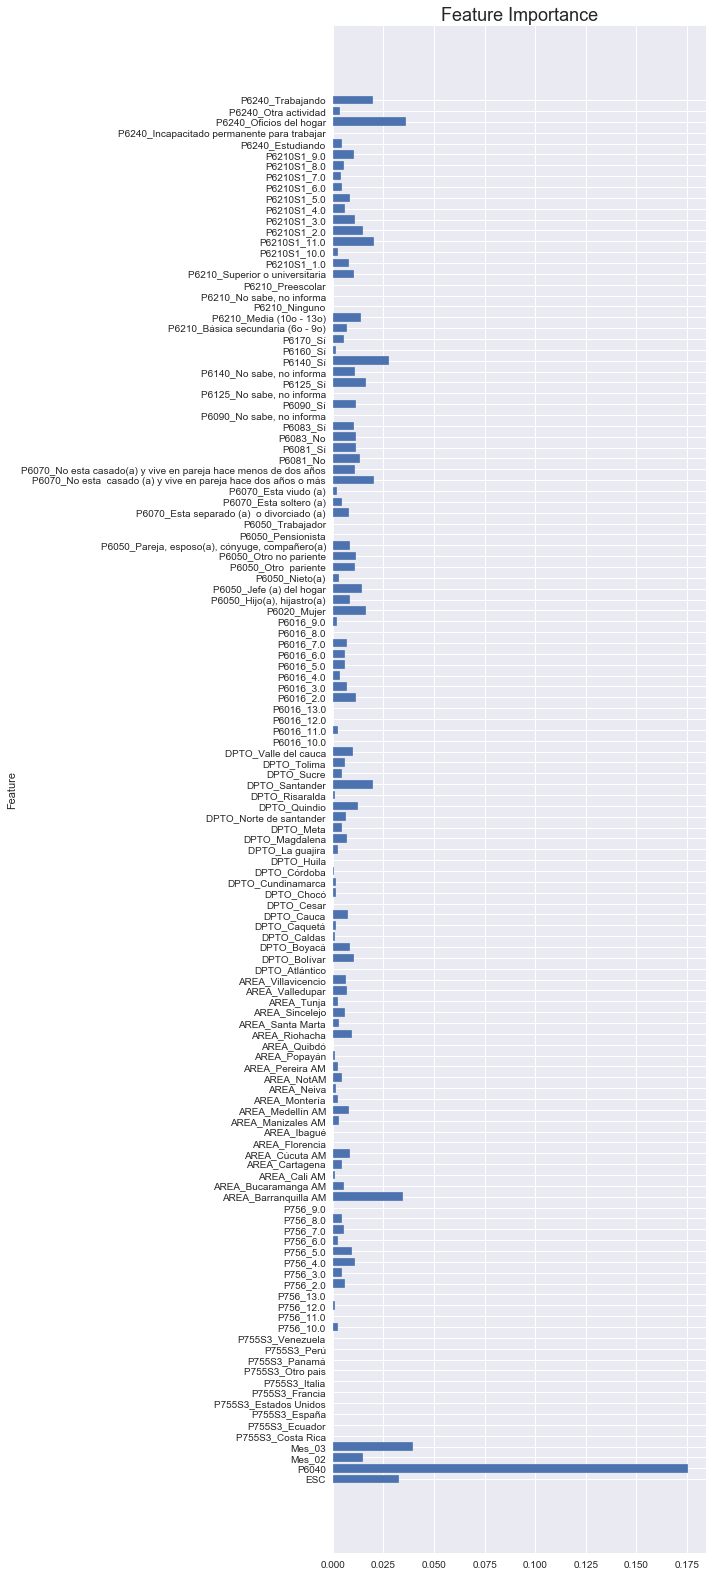

In [130]:
def plot_feature_importances(model):
    '''
    Function to plot the most important features as a horizontal bar chart
    
    Args
        model (sklearn object): fitted sklearn model
    
    Returns 
        horizontal bar chart of the most important features
    '''
    n_features = X_train_tr.shape[1]
    plt.style.use('seaborn')
    plt.figure(figsize=(10,22))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train_tr.columns.values)
    plt.title("Feature Importance", fontsize=18)
    plt.ylabel("Feature")
    plt.tight_layout()
    
plot_feature_importances(clf_bl)

From the above, we can see that `P6040` (age) is by far the feature with the most importance at this stage. Let's so how the BL model performs on the Test Data.

In [131]:
# Test set prediction
clf_bl_pred = clf_bl.predict(X_test_tr)

### Performance Measure

Accuracy is not the ideal performance measure for classification tasks when there is class imbalance. However, a confusion matrix can be useful for summarizing the performance. We will take a look at the confusion matrix for the baseline model, and then we will use the F1 score to compare performance across updated models.

The F1 score is the harmonic mean of precision and recall, meaning that, in contrast with a regular mean which treats all values equally, the harmonic mean gives much more weight to low values. This will be important for our dataset, as evident below...

### BL Confusion Matrix

Text(0.5, 1, 'Confusion Matrix for Baseline Decision Tree Classifier')

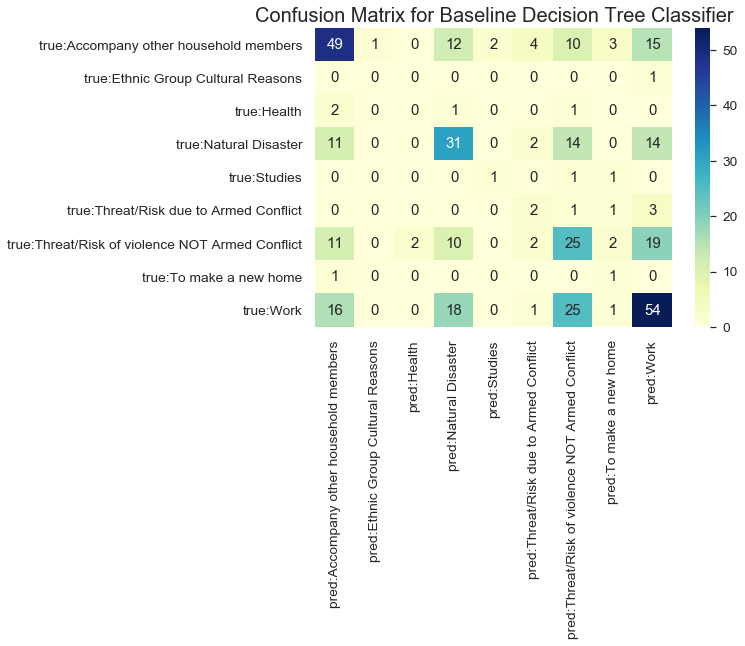

In [133]:
# use class labels for plotting the confusion matrix
unique_label = np.unique([y_test, clf_bl_pred])
cmtx = pd.DataFrame(confusion_matrix(y_test, clf_bl_pred, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label])
sns.set(font_scale=1.25)
sns.heatmap(cmtx, cmap="YlGnBu", annot=True)
plt.title('Confusion Matrix for Baseline Decision Tree Classifier', fontsize=20)

As somewhat expected, the model had an easier time classifying the labels that are 'bigger' in our data - Work, Natural Disaster, and Accompanying other household members. Interestingly, we can see that Threat/Risk of violence NOT Armed Conflict was misclassified as Work at almost the same rate that it was properly classified. We have such few cases of a few labels - Ethnic Group Cultural Reasons and Health - and none were accurately predicted. 

### BL F1 Score

Let's take a look at the F1 score, where we understand that in order for the F1 score to be high, both recall and precision must be high. With that in mind, we can expect that there is room for improvement to this score and our model overall.

In [134]:
# Look at the F1 Score
f1_bl = f1_score(y_test, clf_bl_pred, average="weighted")
f1_bl

0.44389600698003545

In [135]:
import warnings
warnings.filterwarnings("ignore")

For a more detailed at the model performance evaluation metrics, we can easily access the classification report.

In [136]:
print(classification_report(y_test, clf_bl_pred))

                                            precision    recall  f1-score   support

         Accompany other household members       0.54      0.51      0.53        96
             Ethnic Group Cultural Reasons       0.00      0.00      0.00         1
                                    Health       0.00      0.00      0.00         4
                          Natural Disaster       0.43      0.43      0.43        72
                                   Studies       0.33      0.33      0.33         3
         Threat/Risk due to Armed Conflict       0.18      0.29      0.22         7
Threat/Risk of violence NOT Armed Conflict       0.32      0.35      0.34        71
                        To make a new home       0.11      0.50      0.18         2
                                      Work       0.51      0.47      0.49       115

                                  accuracy                           0.44       371
                                 macro avg       0.27      0.32      0.28 

As expected, the f1 score is not great, and we have the issue of it being set to 0.0 in the minority cases with no accurate labels - Ethnic Group Cultural Reasons, Health, and To make a new home. This should be a sign that we should apply balanced weights to our model parameters.

## Feature Selection using PCA

With the encoding of our data, we have jumped to having over 120 features. Let's use PCA to get a sense of how many features we could keep while still being able to explain most of the variance. Based on the results we can then proceed by adding PCA to our pipelines.

In [137]:
pca_1 = PCA(n_components=20)
pca_2 = PCA(n_components=60)
pca_3 = PCA(n_components=100)

principalComponents = pca_1.fit_transform(X_train_tr)
principalComponents = pca_2.fit_transform(X_train_tr)
principalComponents = pca_3.fit_transform(X_train_tr)

print('Explained Variance: \n')
print("With 20 components: ", (np.sum(pca_1.explained_variance_ratio_)))
print("With 60 components: ", (np.sum(pca_2.explained_variance_ratio_)))
print("With 100 components: ", (np.sum(pca_3.explained_variance_ratio_)))

Explained Variance: 

With 20 components:  0.6793381091116183
With 60 components:  0.9747257555375606
With 100 components:  0.9996586221526785


With less than half of the features we can still account for 97% of the variance! 

## Model Pipelines & GridSearch

We are going to construct three pipelines for three different classification algorithms. We will also be adding Principal Component Analysis (PCA) for feature selection, to reduce the dimensionality. Lastly, we will be incorporating a "balanced" class weight to each of the models to account for the class imbalance problem.

In [138]:
# Construct some pipelines
pipe_svm = Pipeline([('pca', PCA(n_components=60)), 
                     ('svmclf', svm.SVC(random_state=123, class_weight="balanced"))])
pipe_tree = Pipeline([('pca', PCA(n_components=60)), 
                      ('dtclf', DecisionTreeClassifier(random_state=123, class_weight="balanced"))])
pipe_rf = Pipeline([('pca', PCA(n_components=60)), 
                    ('rfclf', RandomForestClassifier(random_state=123, class_weight="balanced"))])

# List of pipelines, List of pipeline names
pipelines = [pipe_svm, pipe_tree, pipe_rf]
pipeline_names = ['Support Vector Machine','Decision Tree','Random Forest']

# Loop to fit each of the three pipelines
for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train_tr, y_train)
    
# Compare accuracies
for index, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(X_test_tr, y_test)))

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=60,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svmclf',
                 SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=123, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=60,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svmclf',
                 SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=123, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=60,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dtclf',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=123,
                                        splitter='best'))],
         verbose=False)


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=60,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dtclf',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=123,
                                        splitter='best'))],
         verbose=False)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=60,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('rfclf',
                 RandomForestClassifier(bootstrap=True, class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators='warn', n_jobs=None,
                                        oob_score=False, random_state=123,
                                        ve

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=60,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('rfclf',
                 RandomForestClassifier(bootstrap=True, class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=123,
                                        verbos

Support Vector Machine pipeline test accuracy: 0.423
Decision Tree pipeline test accuracy: 0.353
Random Forest pipeline test accuracy: 0.426


Based on the above, we can see that none of these models are performing particularly well, but SVM performs the best, then Random Forest Classifier, and lastly the Decision Tree Classifier. Let's proceed with looking into SVM in more depth, using GridSearchCV to tune our hyperparameters to hopefully improve model performance. We will then take a look at Ensemble Methods, focusing on Random Forest Classifiers and AdaBoost Classifiers.

## Support Vector Machines

Support Vector Machines are known for being good for classification tasks, especially for small or medium sized datasets. SVM tries to fit the widest possible margin between classes, also known as large margin classification. 

In [139]:
# Instantiate SVM Classifier
svm_clf = svm.SVC(random_state=123, class_weight="balanced")
mean_svm_cv_score = np.mean(cross_val_score(svm_clf, X_train_tr, y_train, cv=3))
print("Mean Cross Val Score for Support Vector Classifier: {}".format(mean_svm_cv_score))

Mean Cross Val Score for Support Vector Classifier: 0.35812286196035786


Within our param grids we will test two kinds of kernels - linear and RBF (Radial Basis Function).  The linear kernel is the default kernel and it works by creating linear decision boundaries. The RBF kernel has 2 parameters (C and gamma, though C is common to all SVM kernels). C is for tuning the trade-off between misclassification of the training set and simplicity of the decision function, while gamma defines how much influence a single training example has.

In [140]:
# List of parameters available for SVC Classifier
svm_clf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 123,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Let's use the pipeline method from earlier, this time adding GridSearchCV for hyperparameters. We will use hyperparameter C, which we can think of it as like a dial - turning it one way or the other to determine if we care more about the margin or about the classification.

In [141]:
# Construct SVC Pipeline
svm_pipe = Pipeline([('pca', PCA(n_components=60)), 
                    ('svmclf', svm.SVC(random_state=123, class_weight="balanced"))])

# Set grid search params
svm_param_grid = [
    {'svmclf__C': [0.1, 1, 10, ], 'svmclf__kernel': ['linear']}, 
    {'svmclf__C': [1, 10], 'svmclf__gamma': [0.001, 0.01, 0.1, 1], 'svmclf__kernel': ['rbf']},
]

# Construct Grid Search
svm_gs = GridSearchCV(estimator=svm_pipe, 
                     param_grid=svm_param_grid, 
                     scoring="f1_weighted", 
                     cv=3, verbose=2, return_train_score=True)

# Fit using GridSearch
svm_gs.fit(X_train_tr, y_train)

# Print Best accuracy and Best Params
print("SVM Best Accuracy: %.3f" % svm_gs.best_score_)
print("\nSVM Best Params:{}".format(svm_gs.best_params_))

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV] svmclf__C=0.1, svmclf__kernel=linear ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. svmclf__C=0.1, svmclf__kernel=linear, total=   0.2s
[CV] svmclf__C=0.1, svmclf__kernel=linear ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............. svmclf__C=0.1, svmclf__kernel=linear, total=   0.2s
[CV] svmclf__C=0.1, svmclf__kernel=linear ............................
[CV] ............. svmclf__C=0.1, svmclf__kernel=linear, total=   0.2s
[CV] svmclf__C=1, svmclf__kernel=linear ..............................
[CV] ............... svmclf__C=1, svmclf__kernel=linear, total=   0.1s
[CV] svmclf__C=1, svmclf__kernel=linear ..............................
[CV] ............... svmclf__C=1, svmclf__kernel=linear, total=   0.1s
[CV] svmclf__C=1, svmclf__kernel=linear ..............................
[CV] ............... svmclf__C=1, svmclf__kernel=linear, total=   0.1s
[CV] svmclf__C=10, svmclf__kernel=linear .............................
[CV] .............. svmclf__C=10, svmclf__kernel=linear, total=   0.4s
[CV] svmclf__C=10, svmclf__kernel=linear .............................
[CV] .............. svmclf__C=10, svmclf__kernel=linear, total=   0.3s
[CV] svmclf__C=10, svmclf__kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   10.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=60, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('svmclf',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf'...
                                            probability=False, random_state=123,
                                            shrinking=True, tol=0.001,
   

SVM Best Accuracy: 0.478

SVM Best Params:{'svmclf__C': 10, 'svmclf__gamma': 0.1, 'svmclf__kernel': 'rbf'}


Our best parameters for the SVM Classifier are with the RBF kernel, C = 10, and gamma at 0.1. Even then our weighted F1 score is not greatly improved from the baseline, at only 0.478. Let's see how the model performs on the test set.

In [142]:
# Generate predictions
svm_gs_pred = svm_gs.predict(X_test_tr)

# Generate metrics for model performance
svm_gs_f1_score = f1_score(y_test, svm_gs_pred, average="weighted")
print("SVM Classifier: Weighed F1 Score on Test Set: {}".format(svm_gs_f1_score))
print(classification_report(y_test, svm_gs_pred))

SVM Classifier: Weighed F1 Score on Test Set: 0.5158851220445836
                                            precision    recall  f1-score   support

         Accompany other household members       0.56      0.68      0.61        96
             Ethnic Group Cultural Reasons       0.00      0.00      0.00         1
                                    Health       1.00      0.25      0.40         4
                          Natural Disaster       0.54      0.57      0.55        72
                                   Studies       0.50      0.33      0.40         3
         Threat/Risk due to Armed Conflict       0.11      0.14      0.12         7
Threat/Risk of violence NOT Armed Conflict       0.42      0.35      0.38        71
                        To make a new home       0.25      0.50      0.33         2
                                      Work       0.56      0.50      0.53       115

                                  accuracy                           0.52       371
         

The weighed F1 score is slightly improved here at 0.5159. 

Text(0.5, 1, 'Confusion Matrix for SVM Classifier')

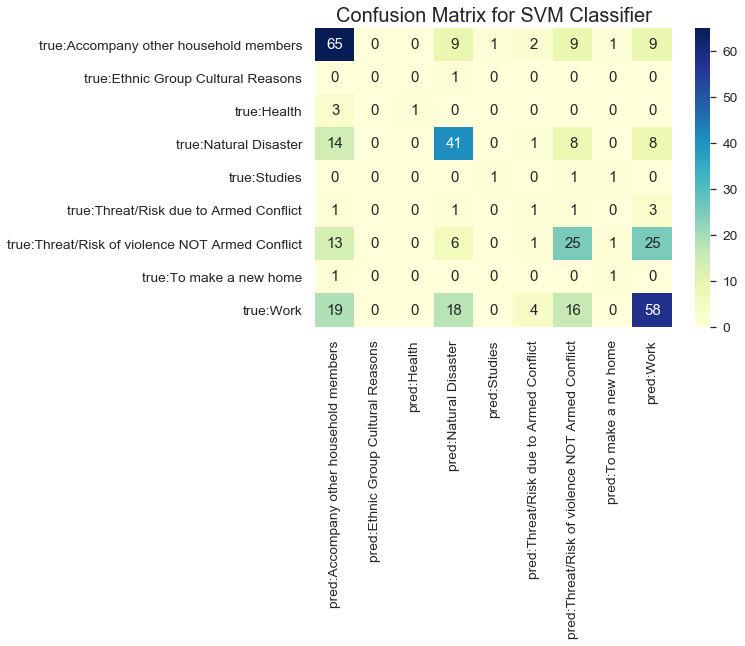

In [143]:
# use class labels for plotting the confusion matrix
unique_label = np.unique([y_test, svm_gs_pred])
cmtx_rf = pd.DataFrame(confusion_matrix(y_test, svm_gs_pred, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label])
sns.set(font_scale=1.25)
sns.heatmap(cmtx_rf, cmap="YlGnBu", annot=True)
plt.title('Confusion Matrix for SVM Classifier', fontsize=20)

We can see above that *Accompanying other household members* had the highest accuracy in correct classifications, followed by *Work*, although Work was also misclassified quite a bit - as *Accompany other household member, Natural Disaster, and Threat/Risk of violence NOT due to Armed Conflict*. *Natural Disaster was also properly classified more times than not.

## Ensemble Methods

### Random Forest Classifier

A Random Forest algorithm is an Ensemble of Decision Trees. Since Decision Trees are greedy algorithms, they will always choose to maximize information gain at each step, which means that it doesn't matter how many trees are added to our forest if they're all trained on the same dataset. In other words, performance will not be better than just using a single tree. But for Ensemble methods, the idea is that variance is a good thing, and we are seeking high variance amongst the trees in our Random Forest. There are two techniques that we can use to make sure that each tree focuses on different things, thereby increasing the variance - Bagging and Subspace Sampling.

Bagging, or Bootstrap Aggregation, is a method that produces variance among trees in our forest by training them on different samples of data by using a portion of our data with replacement. One of the inherent weaknesses with Bagging is that the trees are still focused on the same predictors, meaning that if a predictor that usually provides a strong signal gives bad information for some observation, then all the trees are susceptible to falling for this bad signal, thereby making the wrong prediction.

The Subspace Sampling methods seeks to address this by randomly selecting a subset of features to use as predictors for each node when training a decision tree, instead of using all predictors available.  We will tun the parameter for how many predictors to use at each node of the decision tree.

If we can achieve high diversity among the trees in our forest, then our model will be more resilient to noise and therefore less prone to overfitting.

In [144]:
# Instantiate a Random Forest Classifier
rf_clf = RandomForestClassifier(class_weight="balanced", random_state=123)
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train_tr, y_train, cv=3))
print("Mean Cross Val Score for Random Forest Classifier: {}".format(mean_rf_cv_score))

Mean Cross Val Score for Random Forest Classifier: 0.4439119627885841


In [145]:
# Make a paramter grid for the model
rf_param_grid = {
    'n_estimators':[30,60,90,120],
    'criterion':['gini', 'entropy'], 
    'max_depth':[None, 2, 6, 10]
}

In [146]:
#Construct a grid search
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3, scoring="f1_weighted")

#Fit to training data
rf_grid_search.fit(X_train_tr, y_train)

#Print training accuracy and best parameters
print("Training Accuracy: {}".format(rf_grid_search.best_score_))
print("Optimal Params: {}".format(rf_grid_search.best_params_))

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=123,
                                              verbose=0, warm_start=False),
           

Training Accuracy: 0.47813633004734685
Optimal Params: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 120}


We have a training accuracy score of 48%, which is higher than the baseline. Let's see how it performs with the test set.

In [147]:
# run the model on the test set
rf_grid_search_pred = rf_grid_search.predict(X_test_tr)

# Produce the weighted F1 score
rf_grid_search_f1 = f1_score(y_test, rf_grid_search_pred, average="weighted")
print("Random Forest Classifier: Weighted F1 score on Test set: {}".format(rf_grid_search_f1))
print(classification_report(y_test, rf_grid_search_pred))

Random Forest Classifier: Weighted F1 score on Test set: 0.5280485965896458
                                            precision    recall  f1-score   support

         Accompany other household members       0.64      0.68      0.66        96
             Ethnic Group Cultural Reasons       0.00      0.00      0.00         1
                                    Health       0.67      0.50      0.57         4
                          Natural Disaster       0.52      0.53      0.52        72
                                   Studies       0.33      0.33      0.33         3
         Threat/Risk due to Armed Conflict       0.00      0.00      0.00         7
Threat/Risk of violence NOT Armed Conflict       0.36      0.25      0.30        71
                        To make a new home       0.00      0.00      0.00         2
                                      Work       0.58      0.65      0.61       115

                                  accuracy                           0.54       37

We can see that the F1 score overall is nearly 53%, which is an improvement, and it has increased for each of the labels that have an F1 score.

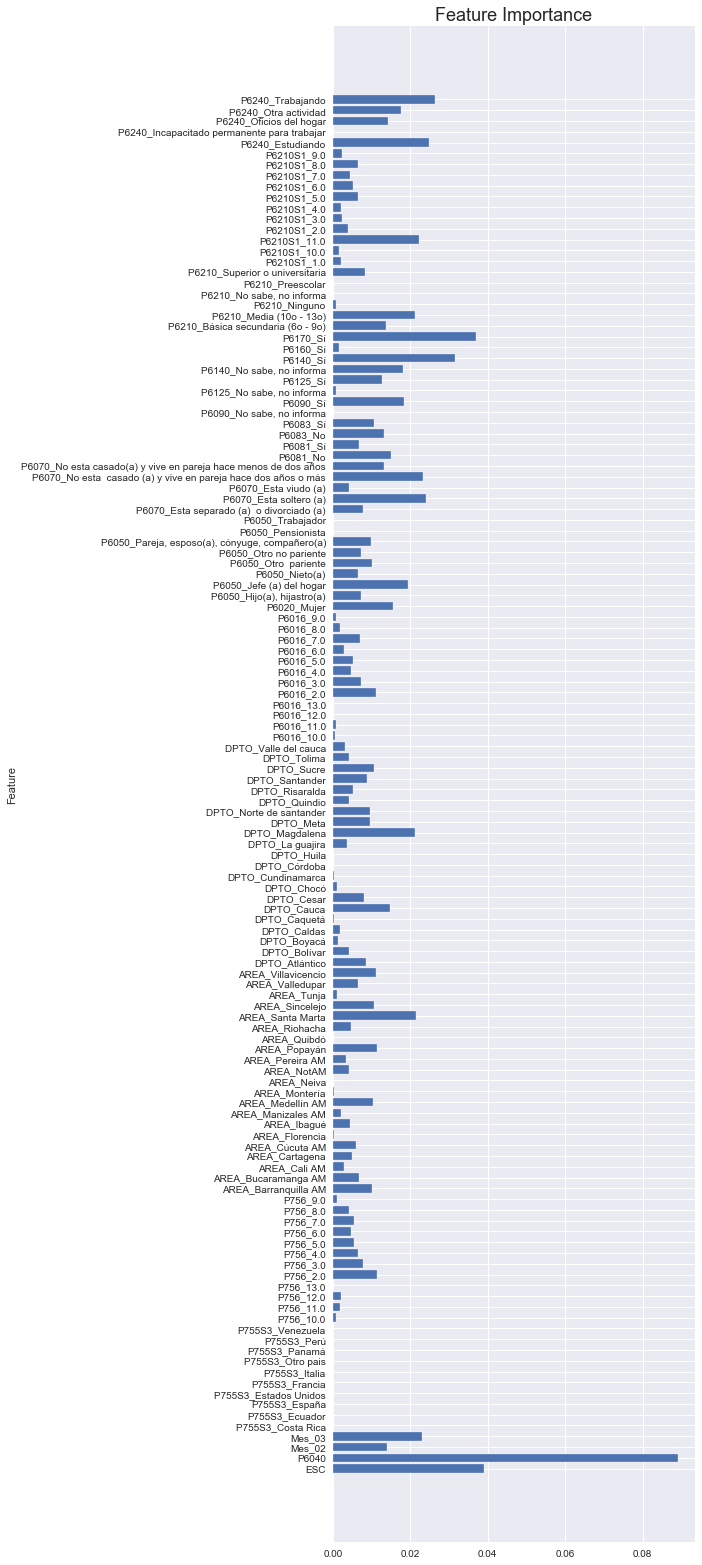

In [148]:
plot_feature_importances(rf_grid_search.best_estimator_)

Text(0.5, 1, 'Confusion Matrix for Random Forest Classifier')

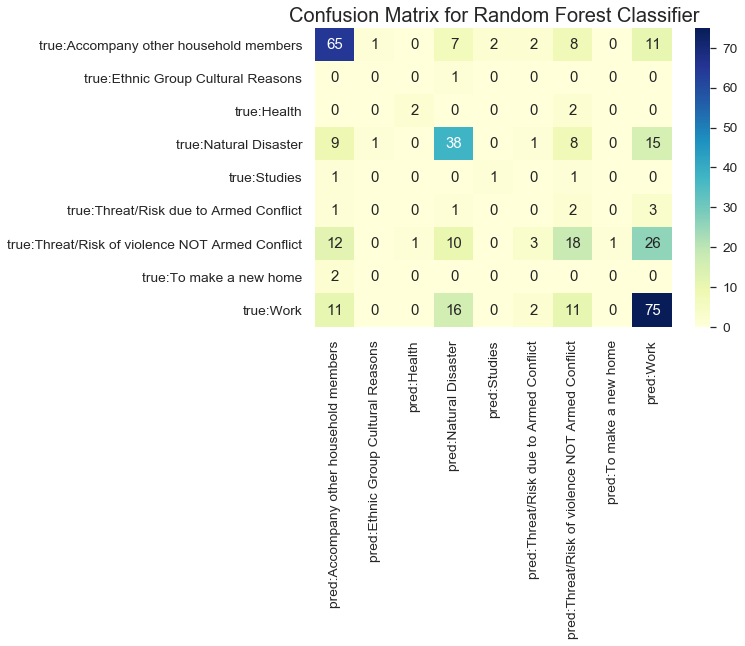

In [149]:
# use class labels for plotting the confusion matrix
unique_label = np.unique([y_test, rf_grid_search_pred])
cmtx_rf = pd.DataFrame(confusion_matrix(y_test, rf_grid_search_pred, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label])
sns.set(font_scale=1.25)
sns.heatmap(cmtx_rf, cmap="YlGnBu", annot=True)
plt.title('Confusion Matrix for Random Forest Classifier', fontsize=20)

Based on the confusion matrix above, we can see that *Work* has the highest accuracy, followed by *Accompany other household members*, then *Natural Disaster*. *Threat/Risk of violence NOT Armed Conflict* was misclassified as *Work* more times than it was properly classified. In fact *Work* seems to be the label that other labels are most likely to be misclassified as.

### AdaBoost

AdaBoost uses a technique where new predictors focus more and more on hard cases to classify, focusing on training instances that its predecessor underfitted. So an AdaBoost classifier first trains a base classifier, then increases the reltive weight of misclassified training instances. Then it trains a second classifier, using the updated weights, and makes predictions on the training set, to then update the instance weights again, and so forth.

The multiclass version of AdaBoost is called SAMME or **Stagewise Additive Modeling using a Multiclass Exponential Loss Function**.  We will identify this in the parameter for our AdaBoost instantiated model below.

In [150]:
# Instantiate an AdaBoost Classifier with a random forest classifier as the base estimator
ab_clf = AdaBoostClassifier(base_estimator=rf_clf, algorithm='SAMME', random_state=123)
mean_ab_cv_score = np.mean(cross_val_score(ab_clf, X_train_tr, y_train, cv=3))
print("Mean Cross Val Score for AdaBoost Classifier: {}".format(mean_ab_cv_score))

Mean Cross Val Score for AdaBoost Classifier: 0.46018858406038166


In [151]:
# Set grid search params, using base_estimator to access our rf estimator params
ab_param_grid = {
    'n_estimators':[10, 30, 60, 90, 120], 
    'base_estimator__criterion': ['gini', 'entropy'], 
    'learning_rate': [1.0, 0.5, 0.1]
}

In [152]:
# Construct GridSearch
gs_ab = GridSearchCV(estimator=ab_clf, 
                   param_grid=ab_param_grid, 
                   cv=3, scoring="f1_weighted", 
                   return_train_score=True)

# Fit using GridSearch
gs_ab.fit(X_train_tr, y_train)

# Best accuracy
print("AdaBoost Classifier Best accuracy: %.3f" % gs_ab.best_score_)

# Best params
print('\nAdaBoost Classifier Best  Params:\n', gs_ab.best_params_)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=RandomForestClassifier(bootstrap=True,
                                                                                class_weight='balanced',
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features='auto',
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                              

AdaBoost Classifier Best accuracy: 0.466

AdaBoost Classifier Best  Params:
 {'base_estimator__criterion': 'gini', 'learning_rate': 0.1, 'n_estimators': 10}


Our weighted F1 score is only slightly better performing than our Baseline F1 score. Let's see how it performs on the test set.  Similarly, we can see that the two numerical variables appear to have the highest feature importance in our model.

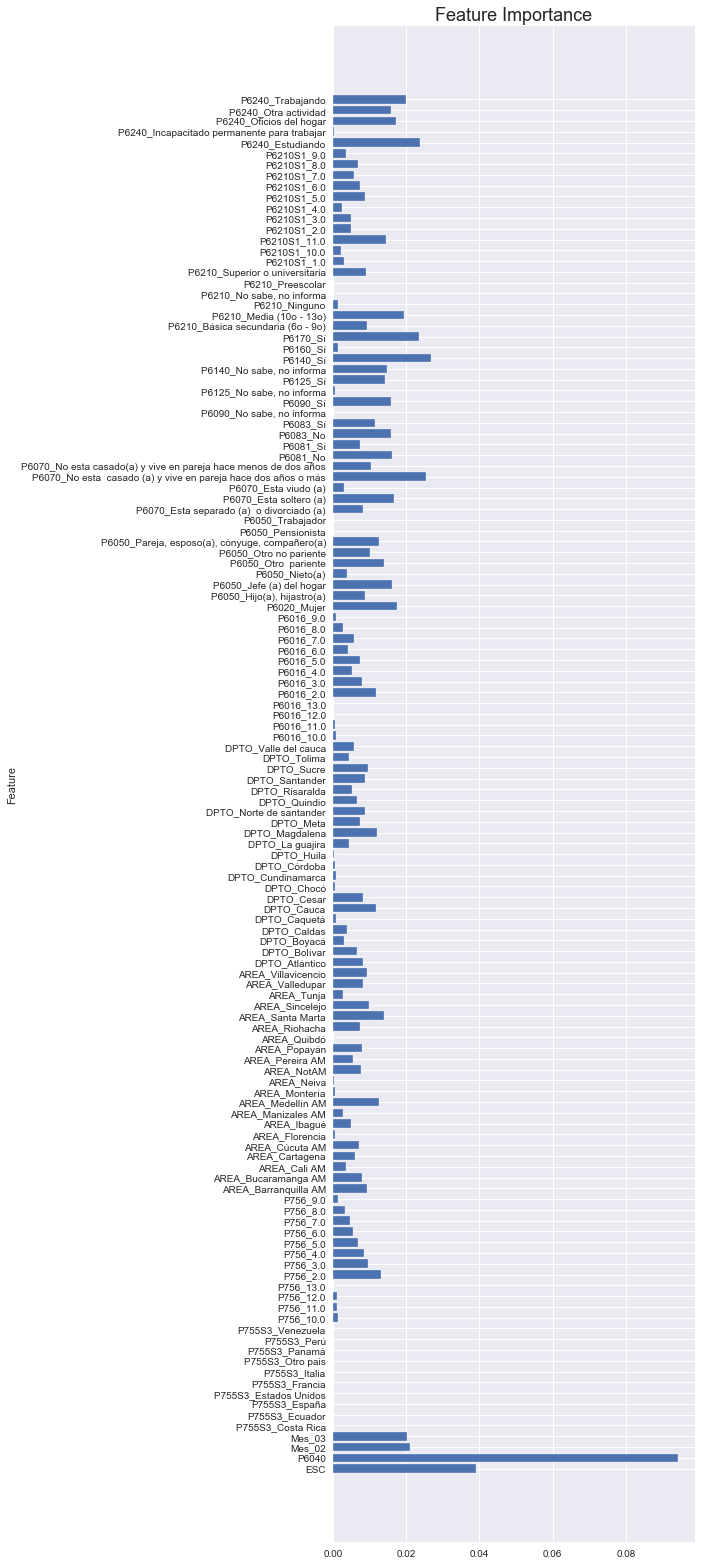

In [153]:
plot_feature_importances(gs_ab.best_estimator_)

In [154]:
#Use your grid search object along with .cv_results to get the full result overview
gs_ab.cv_results_

{'mean_fit_time': array([0.21258473, 0.47961537, 0.58518895, 0.77293078, 0.93447232,
        0.23535236, 0.6582431 , 1.2329615 , 1.83804965, 2.60763446,
        0.20766195, 0.61667005, 1.22923175, 1.84554235, 2.50492398,
        0.22965487, 0.64197   , 1.23385   , 1.64392368, 2.04783503,
        0.22800986, 0.67536338, 1.36405468, 2.02183867, 2.83513705,
        0.22633616, 0.66599504, 1.33489704, 2.03425392, 2.69383176]),
 'std_fit_time': array([2.55201159e-02, 2.13740557e-01, 3.74978561e-01, 6.48228098e-01,
        8.64871209e-01, 2.53820815e-02, 1.32739234e-02, 1.44895344e-03,
        1.73361063e-03, 3.83779885e-02, 2.70168731e-03, 5.91263316e-03,
        2.43072160e-03, 4.57023711e-03, 4.37696489e-02, 2.80303095e-03,
        7.53532095e-03, 4.68588748e-03, 2.46045267e-01, 5.26793998e-01,
        4.14249809e-03, 1.26550154e-03, 1.02633626e-02, 3.35216210e-03,
        1.07522772e-01, 6.15145159e-03, 4.23412155e-03, 5.88235539e-04,
        6.94118512e-03, 1.11281418e-02]),
 'mean_scor

In [155]:
# run the model on the test set
gs_ab_pred = gs_ab.predict(X_test_tr)

# Produce the weighted F1 score
gs_ab_f1 = f1_score(y_test, gs_ab_pred, average="weighted")
print("AdaBoost Classifier with RF Base Estimator: Weighted F1 score on Test set: {}".format(gs_ab_f1))
print(classification_report(y_test, gs_ab_pred))

AdaBoost Classifier with RF Base Estimator: Weighted F1 score on Test set: 0.5251736191463809
                                            precision    recall  f1-score   support

         Accompany other household members       0.59      0.76      0.66        96
             Ethnic Group Cultural Reasons       0.00      0.00      0.00         1
                                    Health       1.00      0.25      0.40         4
                          Natural Disaster       0.51      0.50      0.50        72
                                   Studies       0.50      0.33      0.40         3
         Threat/Risk due to Armed Conflict       0.00      0.00      0.00         7
Threat/Risk of violence NOT Armed Conflict       0.47      0.25      0.33        71
                        To make a new home       0.00      0.00      0.00         2
                                      Work       0.56      0.64      0.60       115

                                  accuracy                      

Text(0.5, 1, 'AdaBoost Classifier')

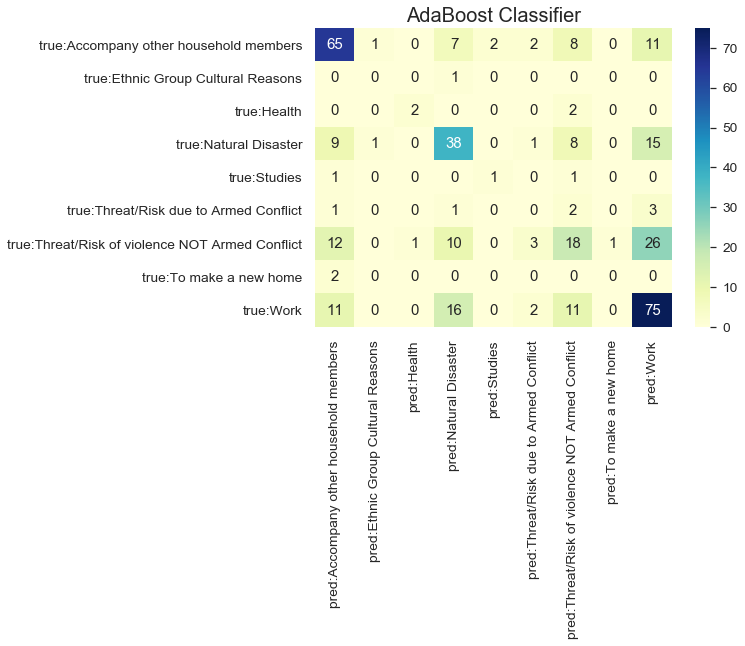

In [156]:
# use class labels for plotting the confusion matrix
unique_label = np.unique([y_test, gs_ab_pred])
cmtx_ab = pd.DataFrame(confusion_matrix(y_test, gs_ab_pred, labels=unique_label), 
                   index=['true:{:}'.format(x) for x in unique_label], 
                   columns=['pred:{:}'.format(x) for x in unique_label])
sns.set(font_scale=1.25)
sns.heatmap(cmtx_rf, cmap="YlGnBu", annot=True)
plt.title('AdaBoost Classifier', fontsize=20)

The predictions are exactly the same between our AdaBoost Classifier and the SVM Classifier (confusion matrices are the same).

# **Interpret**

## Summary of Findings - Random Forest Classifier best performing

We have used four classification algorithms, building a baseline model using a simple Decision Tree Classifier, before moving onto building SVM, Random Forest, and AdaBoost Classification models with GridSearchCV for hyperparameter tuning.

Our dataset has clear class imbalance issues, with a few labels accounting for less than 5% total of the data, combined, while others represent between 25-30% of the data each. For this reason, in each of our models we set the `class_weight` to 'balanced'. This is also why we have opted to use the weighted F1 score as our primary model performance metric.

Below are the model performance metrics for each of the models when run on the test set.

In [157]:
print("Weighted F1 Scores Across Models")
print("--------------------------------------")
print("Baseline Model (Decision Tree Classifier): {}".format(f1_bl))
print("\nSupport Vector Machine Classifier: {}".format(svm_gs_f1_score))
print("\nRandom Forest Classifier: {}".format(rf_grid_search_f1))
print("\nAdaBoost Classifier: {}".format(gs_ab_f1))

Weighted F1 Scores Across Models
--------------------------------------
Baseline Model (Decision Tree Classifier): 0.44389600698003545

Support Vector Machine Classifier: 0.5158851220445836

Random Forest Classifier: 0.5280485965896458

AdaBoost Classifier: 0.5251736191463809


The Random Forest Classifier was the highest performing, with a weighted F1 score of 0.528, which is not an ideal F1 score, but it is an improvement compared to the baseline model which only achieved a weighted F1 score of 0.436. The optimal parameters for our RF Classifier were a max_depth of 10, 120 estimators, and the gini criterion, which is used to quantify variance in multi-class classifications. 

In [158]:
print(classification_report(y_test, rf_grid_search_pred))

                                            precision    recall  f1-score   support

         Accompany other household members       0.64      0.68      0.66        96
             Ethnic Group Cultural Reasons       0.00      0.00      0.00         1
                                    Health       0.67      0.50      0.57         4
                          Natural Disaster       0.52      0.53      0.52        72
                                   Studies       0.33      0.33      0.33         3
         Threat/Risk due to Armed Conflict       0.00      0.00      0.00         7
Threat/Risk of violence NOT Armed Conflict       0.36      0.25      0.30        71
                        To make a new home       0.00      0.00      0.00         2
                                      Work       0.58      0.65      0.61       115

                                  accuracy                           0.54       371
                                 macro avg       0.34      0.33      0.33 

Precision and Recall scores were similar across each of the labels, however, as with all of our models, there were often a few labels that had no metrics likely due to the fact that there were too few data points pertaining to that label (such as *Ethnic Group Cultural Reasons*, *Threat/Risk due to Armed Conflict*, and *To make a new home*.

Across all models, the two numerical variables had the highest feature importance (age and number of years of schooling). It would be interesting to see how this model performs with the inclusion of more numerical data. The categorical variable with the highest feature importance was P1670-Si, which represented respondents who are currently students (school, college, or university).

## Considerations for Further Analysis

- **Removing data with extreme minority labels** Within our data, there were a few labels that had so few observations that given the overall purpose of this exercise for any policy work, a case could be made to remove those labels and/or combine into one label so that there is more data available for training.
- **More Data** We saw in our Baseline Model that the test set was quite small with some labels having no predictions, and with multiple imbalanced labels, unfortunately this provided too little data to learn from in terms of model accuracy and the f1 scores.
- **Time Series Analysis** using the data for each month to see if there are any insights that can be derived over the year of data collection.
- **Labeled data on propensity for return** could help policymakers understand the kinds of short, medium, and long-term interventions that are required based on a better understanding of the factors and likelihood of return for migrants in Colombia.
- **Analysis of how this classification performs when integrating data on Venezuelan migrants in other countries** (Ecuador, Peru, Chile, Brazil, Spain, Portugal, and the U.S.A.)
- **Stratified Sampling** given the number of years that Venezuelan migration has been occurring, it would be important to consider more rigorous sampling approaches of the data in order to deal with sampling bias. For instance, in earlier years of migration, it is commonly understood that these migrants were more educated and with higher incomes, whereas in more recent years, migrants are coming from all socio-economic levels as the humanitarian situation has worsened and as political support has waned among broader groups. Essentially, we might see differences in the reason for migration as it pertains to the respondent's income strata.